<a href="https://colab.research.google.com/github/anisaaulia22/Dataset-Case-Study-2/blob/main/CaseStudy_02_Kelompok_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CaseStudy 02 - KELOMPOK C**


*   Levina Vita Damayanti (11230940000013)
*   Hardina Dewita (11230940000014)
*   Anisa Aulia Nurjanah (11230940000021)
*   Titi Pramudita Wijayanti (11230940000041)





# **Import Library**

In [ ]:
import pandas as pd #Mengolah dan menganalisis data, terutama data berbentuk tabel (baris dan kolom)
import matplotlib.pyplot as plt #Membuat visualisasi data (grafik dan plot)
import seaborn as sns #Library visualisasi yang dibangun di atas matplotlib — tampilannya lebih estetis dan mudah digunakan.
from sklearn.preprocessing import StandardScaler #Menstandarkan skala data numerik agar memiliki: mean = 0, standar deviasi = 1. Tujuannya agar setiap variabel memiliki skala yang seimbang saat digunakan pada algoritma machine learning.
from sklearn.preprocessing import LabelEncoder #Mengubah data kategorikal (teks) menjadi angka agar bisa diproses oleh algoritma machine learning.
import numpy as np #Komputasi numerik — bekerja dengan array dan operasi matematika dengan performa tinggi.

In [ ]:
import warnings; warnings.simplefilter('ignore') #Menangani pesan peringatan (warning). Pesan warning biasanya muncul saat Python mendeteksi sesuatu yang tidak salah fatal, tapi berpotensi menimbulkan masalah. untuk mengabaikan (menyembunyikan) semua pesan warning yang muncul selama program berjalan.

In [ ]:
!pip install kmodes #Untuk menginstal library yang digunakan dalam analisis clustering data kategorikal dan campuran, agar dapat digunakan di dalam Python (terutama di notebook seperti Jupyter atau Google Colab).

In [ ]:
from kmodes.kmodes import KModes #Mengimpor kelas KModes dari library kmodes.
from kmodes.kprototypes import KPrototypes #Mengimpor kelas KPrototypes, juga dari library kmodes
from sklearn.cluster import KMeans #Mengimpor algoritma K-Means dari scikit-learn.
from sklearn.cluster import AgglomerativeClustering #Mengimpor algoritma Agglomerative Clustering, yaitu salah satu jenis Hierarchical Clustering (pengelompokan bertingkat).
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram #Mengimpor fungsi-fungsi pendukung Hierarchical Clustering dari library scipy.

In [ ]:
import pickle

Masalah ini akan dapat diselesakan dengan bantuan beberapa library sebagai berikut:

* Pandas, digunakan untuk melakukan pemroresan analisis data

* Matplotlib, digunakan sebagai dasar untuk melakukan visualisasi data

* Seaborn, digunakan di atas matplotlib untuk melakukan visualisasi data yang lebih menarik

* Scikit - Learn, digunakan untuk mempersiapkan data sebelum dilakukan permodelan

# **Loading Data**

Langkah pertama yang perlu dilakukan adalah membaca data tersebut yang semula adalah textfile menjadi pandas dataframe. Menggunakan fungsi read_csv yang ada di pandas untuk memasukkan data.

In [ ]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/anisaaulia22/Dataset-Case-Study-2/refs/heads/main/Data.csv

--2025-10-20 01:55:27--  https://raw.githubusercontent.com/anisaaulia22/Dataset-Case-Study-2/refs/heads/main/Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9439 (9.2K) [text/plain]
Saving to: ‘data/Data.csv’

Data.csv            100%[===================>]   9.22K  --.-KB/s    in 0.001s  

2025-10-20 01:55:28 (10.6 MB/s) - ‘data/Data.csv’ saved [9439/9439]



In [ ]:
df = pd.read_csv("data/Data.csv", low_memory = False, encoding='utf8')
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,ID,Pendapatan-per-bulan,skor-pengeluaran,Promo,FavFlavor
count,200.000000,2.000000e+02,200.00000,194.000000,200.000000
mean,200.500000,1.867213e+07,50.47000,1.685567,3.605000
std,57.879185,1.076423e+07,26.07101,0.970603,2.743466
min,101.000000,0.000000e+00,1.00000,0.000000,0.000000
25%,150.750000,1.086066e+07,34.75000,1.000000,1.000000
50%,200.500000,1.905738e+07,50.00000,1.000000,3.500000
75%,250.250000,2.581967e+07,73.00000,3.000000,6.000000
max,300.000000,5.000000e+07,101.00000,5.000000,9.000000


# **Data Preprocessing**

Diketahui pada tahap sebelumnya bahwa terdapat nilai null pada data yang menandakan data ini belum benar-benar bersih dan baik untuk dilakukan analisa lebih lanjut. Maka dari itu, akan dilakukan data preprocessing untuk memastikan data yang dimiliki sudah baik untuk dilakukan proses selanjutnya.

**Cek Duplikat**

In [ ]:
#Cek duplikat data
df.duplicated().sum()

np.int64(0)

**Noise dalam Data**

In [ ]:
#Mengecek jumlah kemunculan (frekuensi) dari setiap nilai unik yang ada di kolom Jenis Kelamin
df['Jenis Kelamin'].value_counts()

,count
Jenis Kelamin,
Wanita,109
Pria,86
-,1


In [ ]:
#Mengganti nilai "-" di kolom Jenis Kelamin dengan NaN
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace({"-": np.nan}, regex=True)
unique_JenisKelamin = df['Jenis Kelamin'].unique()
print(unique_JenisKelamin)

['Wanita' 'Pria' nan]


In [ ]:
#Mengecek jumlah kemunculan (frekuensi) dari setiap nilai unik yang ada di kolom Umur
df['Umur'].value_counts()

,count
Umur,
32,11
49,8
19,8
31,8
35,8
47,7
30,7
36,6
48,6


In [ ]:
#Mengganti nilai "35'" di kolom Umur dengan NaN
df['Umur'] = df['Umur'].replace({"35'": "35"}, regex=True)
unique_Umur = df['Umur'].unique()
print(unique_Umur)

['49' '32' '51' '19' '38' '33' '27' '24' '21' '31' '36' '46' '60' '58'
 '47' '45' '22' '18' '59' '44' '39' '35' '20' '30' '23' '48' '37' '40'
 '34' '41' '53' '54' '28' '55' '25' '50' '42' '29' '43' '52' '2' '56' '26'
 '57']


In [ ]:
#Mengecek jumlah kemunculan (frekuensi) dari setiap nilai unik yang ada di kolom skor-pengeluaran
df['skor-pengeluaran'].value_counts()

,count
skor-pengeluaran,
42,8
55,7
73,6
46,6
52,5
...,...
63,1
85,1
12,1


In [ ]:
#Mengganti nilai yang lebih dari 100 di kolom skor-pengeluaran dengan NaN
df.loc[df['skor-pengeluaran'] > 100, 'skor-pengeluaran'] = np.nan
unique_Skor = df['skor-pengeluaran'].unique()
print(unique_Skor)

[52. 86. 41. 55. 42. 95. 56. 77. 47. 54. 92. 15.  4. 50. 16. 87. 32. 28.
 79. 59. 60.  7. 75. 57.  6. 73. 69. 40.  5. 89. 49. 13. 88. 48. 10. 36.
  3. 31. 39. 46. 83. 68. 14. 24. 65. 91. 61. 90. 58. 93. 34. 44. 17. 53.
 97. 27. 11. 43. 22. 18. 35. 99. 66. 29.  9. 45. 23. 82. nan 51. 20. 72.
 71.  1. 81. 98. 26. 76. 78. 63. 74. 85. 12.  8. 94.]


In [ ]:
#Mengecek jumlah kemunculan (frekuensi) dari setiap nilai unik yang ada di kolom Menikah
df['Menikah'].value_counts()

,count
Menikah,
1,160
0,26
,1
-,1


In [ ]:
#Mengganti nilai "-'" di kolom Menikah dengan NaN
df['Menikah'] = df['Menikah'].replace({"-": np.nan}, regex=True)
unique_Menikah = df['Menikah'].unique()

#Mengganti nilai ' ' di kolom Menikah dengan NaN
df['Menikah'] = df['Menikah'].replace({' ': np.nan}, regex=True)
unique_Menikah = df['Menikah'].unique()
print(unique_Menikah)

['1' '0' nan]


In [ ]:
#Mengecek jumlah kemunculan (frekuensi) dari setiap nilai unik yang ada di kolom Kota
df['Kota'].value_counts()

,count
Kota,
Jakarta,87
Depok,59
Tangerang,53
JJakarta,1


In [ ]:
#Mengganti nilai "JJakarta" di kolom Kota dengan nilai "Jakarta"
df['Kota'] = df['Kota'].replace({"JJakarta": "Jakarta"}, regex=True)
unique_Kota = df['Kota'].unique()
print(unique_Kota)

['Jakarta' 'Depok' 'Tangerang']


In [ ]:
#Mengecek jumlah kemunculan (frekuensi) dari setiap nilai unik yang ada di kolom Promo
df['Promo'].value_counts()

,count
Promo,
1.0,86
3.0,50
2.0,43
0.0,14
5.0,1


In [ ]:
#Mengganti nilai Promo yang lebih dari 3 di kolom Promo dengan NaN
df.loc[df['Promo'] >3, 'Promo'] = np.nan
unique_Promo = df['Promo'].unique()
print(unique_Promo)

[ 1.  2.  0. nan  3.]


In [ ]:
#Mengecek jumlah kemunculan (frekuensi) dari setiap nilai unik yang ada di kolom HariFav
df['HariFav'].value_counts()

,count
HariFav,
Senin,66
Sabtu,54
Minggu,43
Selasa,21
Kamis,6
Rabu,5
Jumat,5


In [ ]:
#Mengecek jumlah kemunculan (frekuensi) dari setiap nilai unik yang ada di kolom FavFlavor
df['FavFlavor'].value_counts()

,count
FavFlavor,
0,40
2,20
6,20
3,20
7,20
5,20
1,20
4,20
8,19


In [ ]:
#Mengganti nilai FavFlavor yang lebih dari 8 di kolom FavFlavor dengan NaN
df.loc[df['FavFlavor'] >8, 'FavFlavor'] = np.nan
unique_Promo = df['FavFlavor'].unique()
print(unique_Promo)

[ 2.  6.  3.  7.  8.  0.  5.  4.  1. nan]


Dalam tahap pembersihan data, dilakukan pemeriksaan terhadap beberapa kolom pada dataset untuk mengidentifikasi dan menangani nilai yang tidak valid. Nilai-nilai yang tidak sesuai diperbaiki atau diganti dengan NaN agar data menjadi konsisten.
- ‘Jenis Kelamin’: Karakter tanda minus (“-”) diganti dengan NaN.
- ‘Umur’: Nilai bertanda kutip seperti (35') diperbaiki menjadi 35.
- ‘skor-pengeluaran’: Nilai yang melebihi 100 dianggap tidak valid dan diubah menjadi NaN.
- ‘Menikah’: Simbol tanda minus (“-”) diganti dengan NaN.
- ‘Kota’: Kesalahan penulisan “JJakarta” dikoreksi menjadi “Jakarta”.
- ‘Promo’: Nilai lebih besar dari 3 diubah menjadi NaN.
- ‘FavFlavor’: Nilai yang melebihi 8 diganti dengan NaN.

# **Missing Value**

In [ ]:
# Cek Missing Value
df.isnull().sum()

,0
ID,0
Jenis Kelamin,5
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,1
Menikah,14
Kota,0
Promo,7
HariFav,0
FavFlavor,1


In [ ]:
# Hitung jumlah dan persentase missing value
missing_percent = (df.isnull().sum() / len(df)) * 100

print("Persentase Missing Value per Kolom:")
print(missing_percent)

Persentase Missing Value per Kolom:
ID                      0.0
Jenis Kelamin           2.5
Umur                    0.0
Pendapatan-per-bulan    0.0
skor-pengeluaran        0.5
Menikah                 7.0
Kota                    0.0
Promo                   3.5
HariFav                 0.0
FavFlavor               0.5
dtype: float64


In [ ]:
df['skor-pengeluaran'].describe()


,skor-pengeluaran
count,199.000000
mean,50.216080
std,25.887647
min,1.000000
25%,34.500000
50%,50.000000
75%,73.000000
max,99.000000


In [ ]:
# Ubah missing value setiap variabel dengan nilai modus
df['skor-pengeluaran'].fillna(df['skor-pengeluaran'].mean(), inplace=True)
df['Jenis Kelamin'].fillna(df['Jenis Kelamin'].mode()[0], inplace=True)
df['Menikah'].fillna(df['Menikah'].mode()[0], inplace=True)
df['Promo'].fillna(df['Promo'].mode()[0], inplace=True)
df['FavFlavor'].fillna(df['FavFlavor'].mode()[0], inplace=True)
df.isnull().sum()

,0
ID,0
Jenis Kelamin,0
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,0
Kota,0
Promo,0
HariFav,0
FavFlavor,0


In [ ]:
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52.0,1,Jakarta,1.0,Sabtu,2.0
1,102,Wanita,32,33606557,86.0,1,Depok,1.0,Minggu,6.0
2,103,Pria,51,15983606,41.0,1,Jakarta,2.0,Minggu,3.0
3,104,Pria,19,12704918,55.0,0,Jakarta,1.0,Rabu,7.0
4,105,Wanita,38,20081967,42.0,1,Jakarta,2.0,Senin,8.0
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73.0,1,Depok,1.0,Senin,0.0
196,297,Pria,57,15983606,51.0,1,Jakarta,1.0,Minggu,5.0
197,298,Wanita,35,43032786,79.0,1,Depok,1.0,Senin,7.0
198,299,Wanita,23,1229508,94.0,1,Depok,0.0,Selasa,0.0


Pada tahap penanganan missing value, setiap kolom yang memiliki data kosong diisi menggunakan nilai modus, yaitu nilai yang paling sering muncul dalam kolom tersebut, agar distribusi data tetap representatif. Kolom yang mengalami pengisian meliputi skor-pengeluaran, Jenis Kelamin, Menikah, Promo, dan FavFlavor. Setelah proses imputasi dilakukan, dilakukan pula pemeriksaan terhadap data duplikat untuk memastikan bahwa dataset tidak hanya bebas dari nilai yang hilang, tetapi juga tidak mengandung entri yang berulang.


# **Mengubah Data Type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         200 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    float64
 5   Menikah               200 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 200 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 15.8+ KB


In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Umur'] = df['Umur'].astype('int64')
df['Menikah'] = df['Menikah'].astype('category')
df['Kota'] = df['Kota'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['FavFlavor'] = df['FavFlavor'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
df['skor-pengeluaran'] = df['skor-pengeluaran'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    200 non-null    int64   
 1   Jenis Kelamin         200 non-null    category
 2   Umur                  200 non-null    int64   
 3   Pendapatan-per-bulan  200 non-null    int64   
 4   skor-pengeluaran      200 non-null    int64   
 5   Menikah               200 non-null    category
 6   Kota                  200 non-null    category
 7   Promo                 200 non-null    category
 8   HariFav               200 non-null    category
 9   FavFlavor             200 non-null    category
dtypes: category(6), int64(4)
memory usage: 8.8 KB


In [ ]:
df.describe()

,ID,Umur,Pendapatan-per-bulan,skor-pengeluaran
count,200.000000,200.000000,2.000000e+02,200.000000
mean,200.500000,37.355000,1.867213e+07,50.215000
std,57.879185,11.992417,1.076423e+07,25.822525
min,101.000000,2.000000,0.000000e+00,1.000000
25%,150.750000,28.750000,1.086066e+07,34.750000
50%,200.500000,36.000000,1.905738e+07,50.000000
75%,250.250000,48.000000,2.581967e+07,73.000000
max,300.000000,60.000000,5.000000e+07,99.000000


# **Outlier**

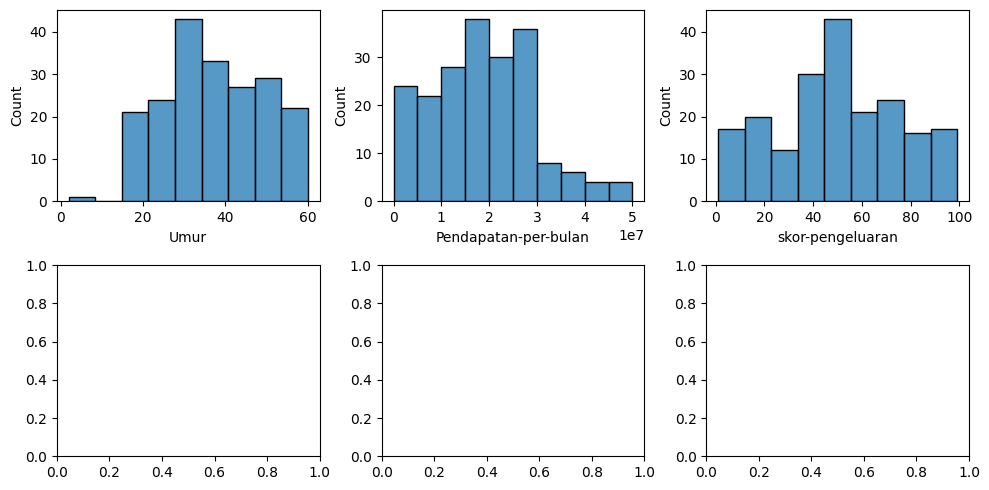

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5), sharey=False)
sns.histplot(df['Umur'], ax=axes[0, 0])
sns.histplot(df['Pendapatan-per-bulan'], ax=axes[0, 1])
sns.histplot(df['skor-pengeluaran'], ax=axes[0, 2])
plt.tight_layout()
plt.show()

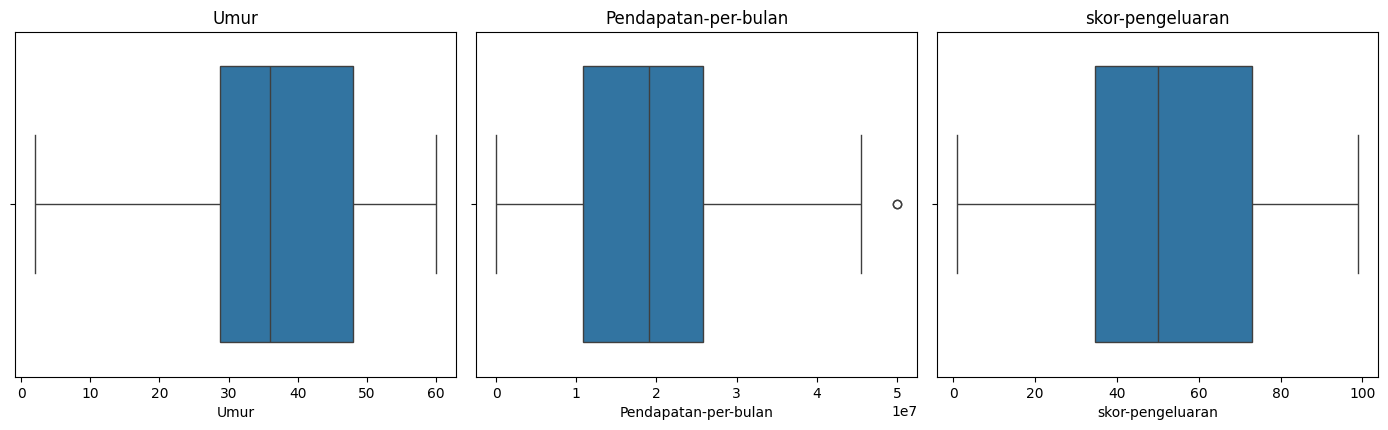

In [ ]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
sns.boxplot(x="Umur", data=df)
plt.title("Umur")

plt.subplot(2, 3, 2)
sns.boxplot(x="Pendapatan-per-bulan", data=df)
plt.title("Pendapatan-per-bulan")

plt.subplot(2, 3, 3)
sns.boxplot(x="skor-pengeluaran", data=df)
plt.title("skor-pengeluaran")

plt.tight_layout()
plt.show()

In [ ]:
Q1_Umur = df['Umur'].quantile(0.25)
Q2_Umur = df['Umur'].quantile(0.50)
Q3_Umur = df['Umur'].quantile(0.75)
IQR_Umur = Q3_Umur - Q1_Umur
outlier_Umur = (df['Umur'] <= Q1_Umur - 1.5*IQR_Umur) | (df['Umur'] >= Q3_Umur + 1.5*IQR_Umur)
print("Banyaknya outlier = ",sum(outlier_Umur))

Banyaknya outlier =  0


In [ ]:
Q1_Pendapatan_per_bulan = df['Pendapatan-per-bulan'].quantile(0.25)
Q2_Pendapatan_per_bulan = df['Pendapatan-per-bulan'].quantile(0.50)
Q3_Pendapatan_per_bulan = df['Pendapatan-per-bulan'].quantile(0.75)
IQR_Pendapatan_per_bulan = Q3_Pendapatan_per_bulan - Q1_Pendapatan_per_bulan
outlier_Pendapatan_per_bulan = (df['Pendapatan-per-bulan'] <= Q1_Pendapatan_per_bulan  - 1.5*IQR_Pendapatan_per_bulan) | (df['Pendapatan-per-bulan'] >= Q3_Pendapatan_per_bulan + 1.5*IQR_Pendapatan_per_bulan)
print("Banyaknya outlier = ",sum(outlier_Pendapatan_per_bulan))

Banyaknya outlier =  2


In [ ]:
# Terapkan capping/winsorizing untuk menangani outlier pada variabel pendapatan per bulan
df['Pendapatan-per-bulan-capped'] = df['Pendapatan-per-bulan'].clip(lower=Q1_Pendapatan_per_bulan  - 1.5*IQR_Pendapatan_per_bulan, upper=Q3_Pendapatan_per_bulan + 1.5*IQR_Pendapatan_per_bulan)

# Lihat beberapa data teratas
df[['Pendapatan-per-bulan', 'Pendapatan-per-bulan-capped']].head()

,Pendapatan-per-bulan,Pendapatan-per-bulan-capped
0,13114754,13114754.0
1,33606557,33606557.0
2,15983606,15983606.0
3,12704918,12704918.0
4,20081967,20081967.0


In [ ]:
Q1_skor_pengeluaran= df['skor-pengeluaran'].quantile(0.25)
Q2_skor_pengeluaran = df['skor-pengeluaran'].quantile(0.50)
Q3_skor_pengeluaran = df['skor-pengeluaran'].quantile(0.75)
IQR_skor_pengeluaran = Q3_skor_pengeluaran - Q1_skor_pengeluaran
outlier_skor_pengeluaran = (df['skor-pengeluaran'] <= Q1_skor_pengeluaran
                            - 1.5*IQR_skor_pengeluaran) | (df['skor-pengeluaran'] >= Q3_skor_pengeluaran + 1.5*IQR_skor_pengeluaran)
print("Banyaknya outlier = ",sum(outlier_skor_pengeluaran))

Banyaknya outlier =  0


In [ ]:
df.describe()

,ID,Umur,Pendapatan-per-bulan,skor-pengeluaran,Pendapatan-per-bulan-capped
count,200.000000,200.000000,2.000000e+02,200.000000,2.000000e+02
mean,200.500000,37.355000,1.867213e+07,50.215000,1.865471e+07
std,57.879185,11.992417,1.076423e+07,25.822525,1.071457e+07
min,101.000000,2.000000,0.000000e+00,1.000000,0.000000e+00
25%,150.750000,28.750000,1.086066e+07,34.750000,1.086066e+07
50%,200.500000,36.000000,1.905738e+07,50.000000,1.905738e+07
75%,250.250000,48.000000,2.581967e+07,73.000000,2.581967e+07
max,300.000000,60.000000,5.000000e+07,99.000000,4.825820e+07


Berdasarkan hasil describe ditemukan umur termuda berada di umur 2 tahun. Sedangkan rata-rata umur berada di angka 37 tahun. Maka kami memutuskan untuk melakukan pengecekan untuk umur. Dan berdasarkan visualisasi didapatkan umur dibawah 10 yang jaraknya cukup jauh jika dibandingkan dengan umur yang paling rendah lainnya.

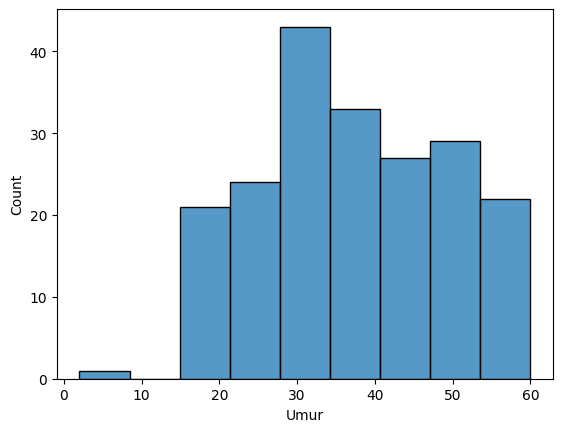

In [ ]:
sns.histplot(df['Umur'])
plt.show()

In [ ]:
df.loc[df['Umur'] <10]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,Pendapatan-per-bulan-capped
119,220,Pria,2,18032786,41,0,Jakarta,2.0,Senin,0.0,18032786.0


In [ ]:
#Mengganti semua nilai umur < 10 dengan nilai median umur
df.loc[df['Umur'] < 10, 'Umur'] = df['Umur'].median()

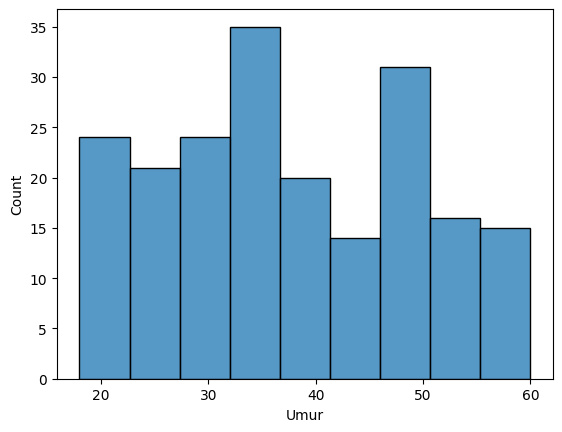

In [ ]:
sns.histplot(df['Umur'])
plt.show()

Dari hasil visualisasi tersebut maka variabel umur terbaru sudah lebih merata

# **EDA NUMERIK**

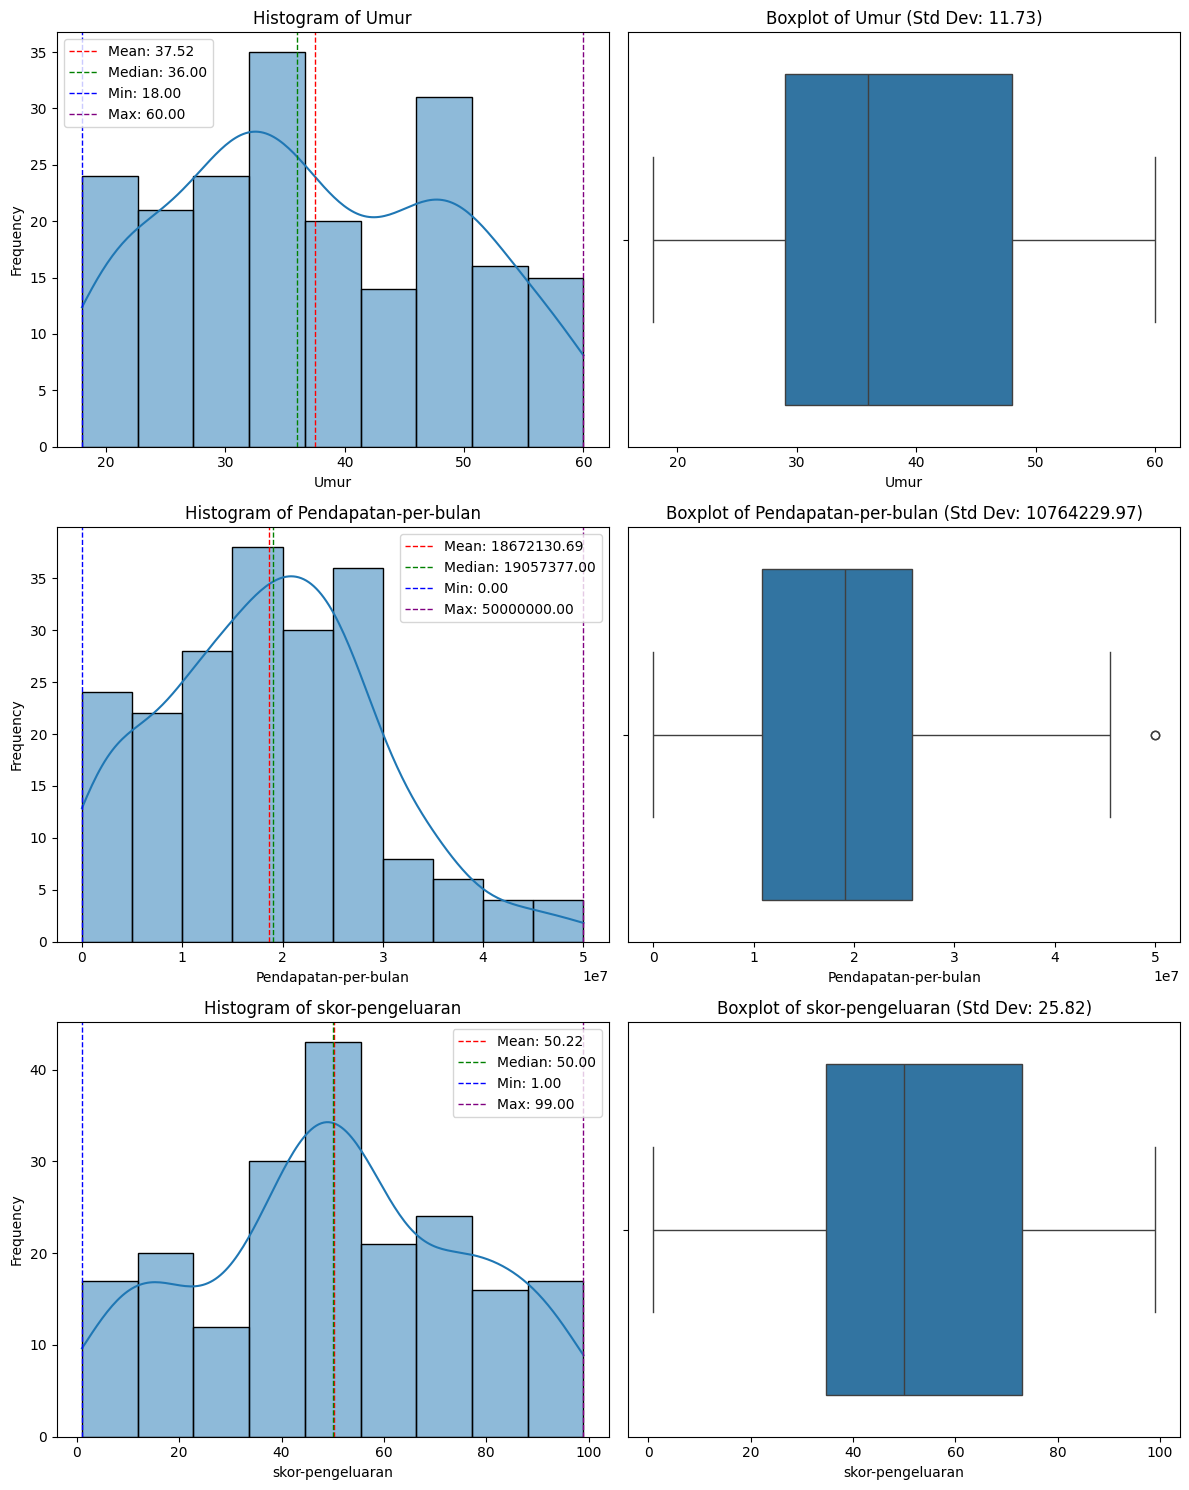

In [ ]:
#pilih kolom numerik

kolom_numerik = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']

#ukuran figure sesuai jumlah kolom
n = len(kolom_numerik)
rows = n
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, 5*n))

for i, col in enumerate (kolom_numerik) :
    # Histogram with KDE
    sns.histplot(df[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    mean_val = df[col].mean()
    median_val = df[col].median()
    min_val = df[col].min()
    max_val = df[col].max()

    axes[i, 0].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
    axes[i, 0].axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
    axes[i, 0].axvline(min_val, color='blue', linestyle='dashed', linewidth=1, label=f'Min: {min_val:.2f}')
    axes[i, 0].axvline(max_val, color='purple', linestyle='dashed', linewidth=1, label=f'Max: {max_val:.2f}')
    axes[i, 0].legend()


    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1])
    # standar deviasi untuk boxplot
    std_val = df[col].std()
    axes[i, 1].set_title(f'Boxplot of {col} (Std Dev: {std_val:.2f})')
    axes[i, 1].set_xlabel(col)


plt.tight_layout()
plt.show()

**1. Segmentasi Berdasarkan Umur**

Dari boxplot dan histogram umur, terlihat bahwa mayoritas pelanggan MixITup berada di rentang usia 30 hingga 50 tahun, dengan usia rata-rata 37,5 tahun dan median 36 tahun. Distribusi usia juga menunjukkan adanya variasi yang cukup merata di seluruh kelompok umur.

Rekomendasi:
*   Fokus Segmentasi pada Usia Produktif (30–50 Tahun):
Strategi pemasaran dapat difokuskan pada kelompok umur ini karena kelompok ini umumnya sudah memiliki pendapatan stabil dan lebih selektif dalam memilih produk.
*   Program Loyalitas dan Penghargaan Personal:
Misal seperti Diskon atau hadiah ulang tahun, reward khusus bagi pelanggan yang konsisten berbelanja dalam periode tertentu, penawaran bundling untuk  satu keluarga seperti penambahan produk yang dibeli.
*   Kampanye Digital Interaktif:
Menggunakan media sosial dan platform digital,seperti Instagram, Facebook, atau YouTube dengan konten visual yang menggambarkan keseimbangan antara kualitas dan produk.

**2. Segmentasi Berdasarkan Pendapatan per Bulan**

Dari boxplot pendapatan per bulan, terlihat rentang pendapatan yang sangat luas, dari kurang dari 1 juta hingga sekitar 50 juta rupiah. Rata-rata pendapatan bulanan adalah sekitar 18,6 juta rupiah dengan median 19,2 juta rupiah, yang menunjukkan bahwa mayoritas pelanggan MixITup berada di segmen menengah hingga atas.

Rekomendasi:
*   Segmen Pendapatan Rendah (di bawah ±10 juta per bulan)
Untuk kelompok ini, tawarkan produk dengan harga terjangkau seperti:
Paket hemat atau promosi bundling yang memberikan nilai lebih, program diskon musiman atau cashback untuk meningkatkan daya beli, produk dengan fitur esensial agar tetap relevan tanpa membebani finansial pelanggan.

*   Segmen Pendapatan Menengah (sekitar 10–30 juta per bulan)
Ini merupakan kelompok mayoritas pelanggan, sesuai puncak distribusi pada histogram.
Strategi yang sesuai meliputi:
Penawaran bernilai tambah, misalnya paket berlangganan dengan manfaat tambahan, program loyalitas agar pelanggan tetap setia, seperti poin reward atau hadiah eksklusif, penyesuaian harga dinamis (dynamic pricing) untuk menjaga keseimbangan antara kualitas dan keterjangkauan.

* Segmen Pendapatan Tinggi (di atas 30 juta, termasuk outlier hingga 50 juta)
Berdasarkan boxplot, kelompok ini termasuk minoritas dengan daya beli tinggi.
Dapat ditargetkan melalui:
Produk atau layanan premium dengan pengalaman eksklusif, personalisasi layanan, seperti konsultasi khusus, prioritas pengiriman, atau produk edisi terbatas, langganan eksklusif yang menonjolkan kemudahan, kenyamanan, dan status.

**3. Segmentasi Berdasarkan Skor Pengeluaran**
Data skor pengeluaran menunjukkan rata-rata pengeluaran di sekitar 50 dengan standar deviasi sekitar 25,9. Hal ini mengindikasikan adanya variasi besar dalam pola belanja pelanggan MixITup.

Rekomendasi:
* Skor Pengeluaran Rendah
Dorong pembelian dengan promosi insentif seperti diskon berjenjang atau hadiah kecil dan gunakan kampanye penawaran waktu terbatas untuk meningkatkan frekuensi belanja.

* Skor Pengeluaran Menengah
Tawarkan paket bundling dan program loyalitas agar pelanggan tetap aktif berbelanja dan berikan rekomendasi produk personalisasi untuk mendorong pembelian tambahan.

* Skor Pengeluaran Tinggi
Sediakan reward eksklusif dan layanan premium sebagai bentuk apresiasi dan terapkan layanan personalisasi dan akses prioritas untuk memperkuat loyalitas.





# **EDA KATEGORIK**


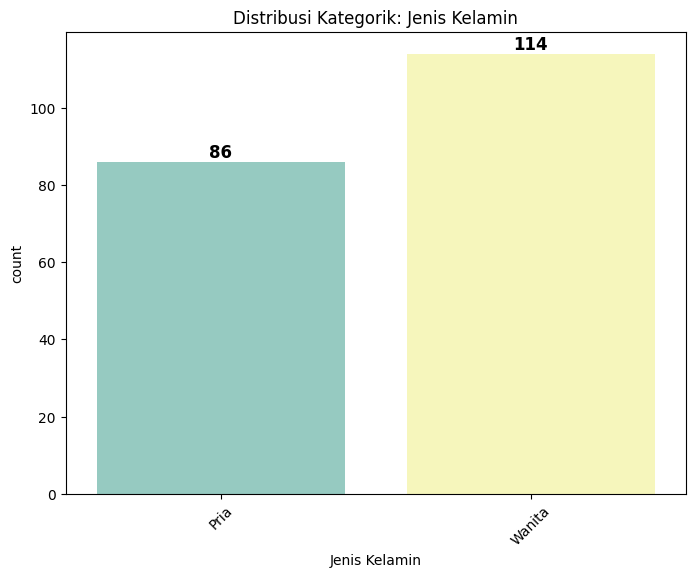

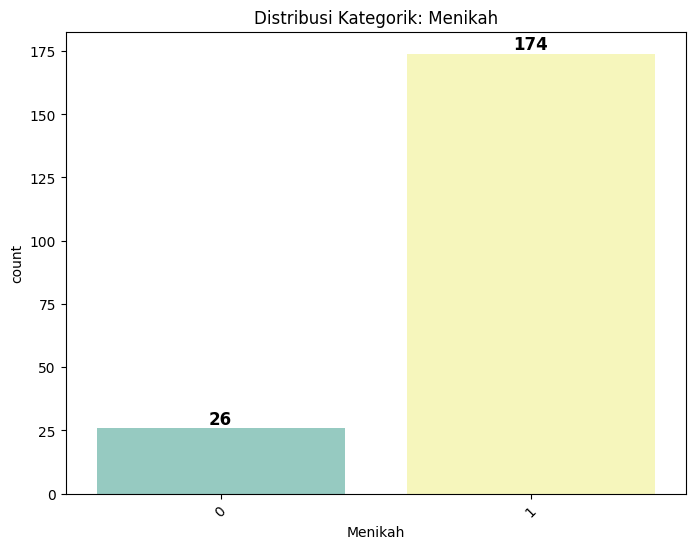

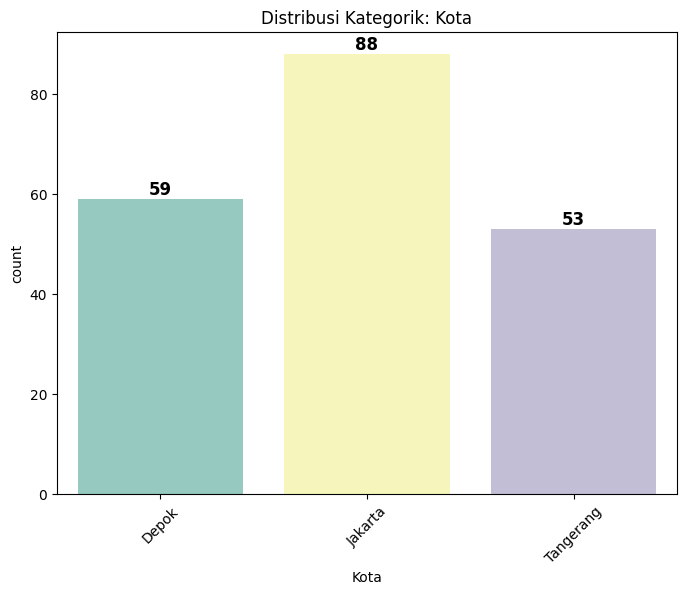

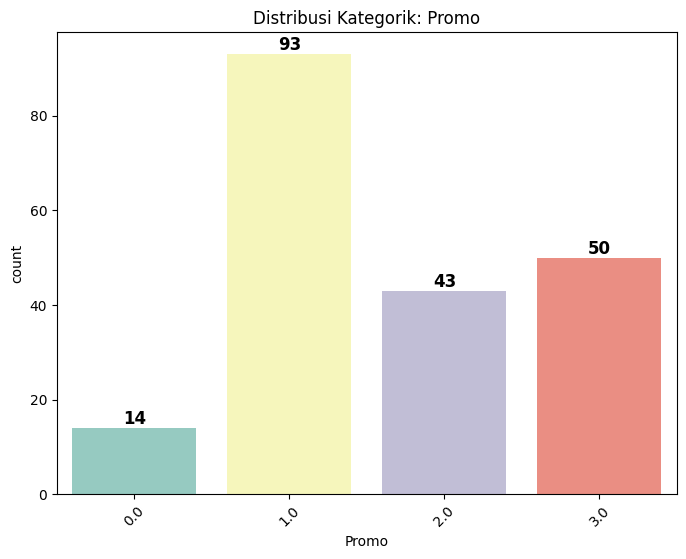

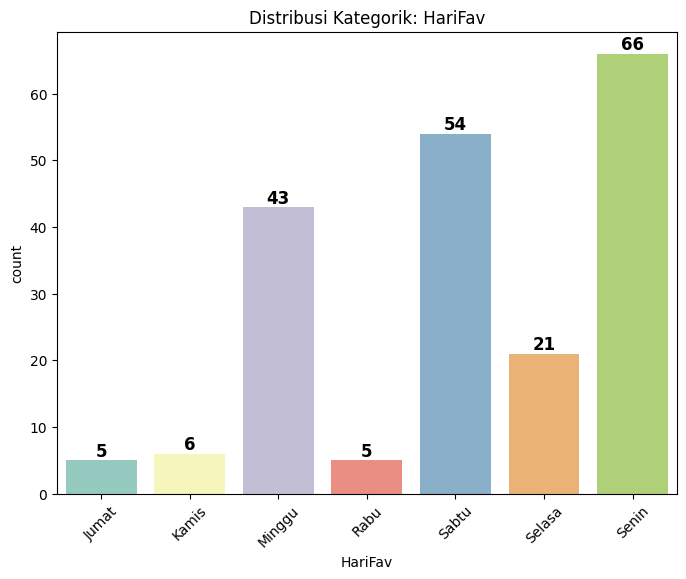

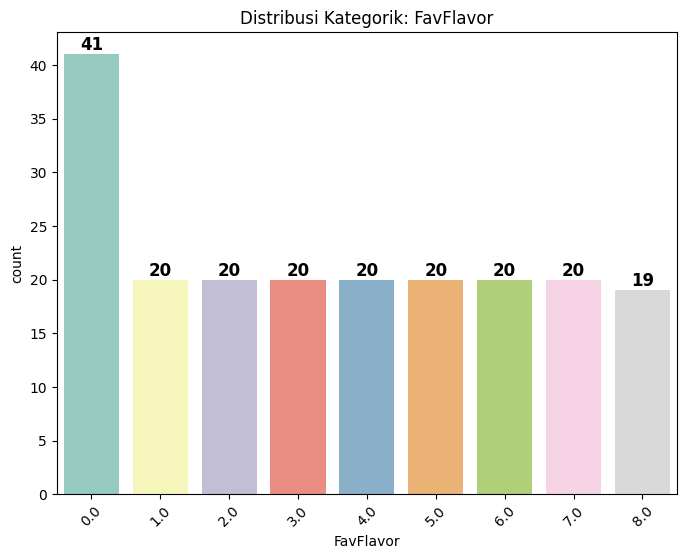

In [ ]:
#kolom kategorik
kolom_kategorik = ['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']

# Loop untuk membuat countplot dan menampilkan total di atas setiap bar
for kolom in kolom_kategorik:
    plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
    ax = sns.countplot(x=kolom, data=df, hue=kolom, palette='Set3', legend=False)  # Memperbaiki penggunaan palette

    # Menambahkan total frekuensi di atas setiap bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')

    plt.title(f'Distribusi Kategorik: {kolom}')
    plt.xticks(rotation=45)  # Rotasi label jika diperlukan
    plt.show()

Berdasarkan hasil Exploratory Data Analysis (EDA) terhadap data kategorik yang mencakup variabel Jenis Kelamin, Status Pernikahan, Kota, Promo, Hari Favorit, dan Rasa Favorit, diperoleh bahwa pembeli didominasi oleh wanita yang sudah menikah, dengan sebagian besar berasal dari Jakarta. Berdasarkan gambar distribusi kategorik promo para pembeli jarang menggunakan promo. Selain itu, hari Senin dan akhir pekan menjadi hari yang paling disukai, menunjukkan adanya kecenderungan aktivitas atau preferensi tertentu pada awal dan akhir minggu. Pada variabel Rasa Favorit, terdapat satu rasa dominan yaitu vanilla yang paling banyak dibeli, meskipun secara keseluruhan variasi rasa tetap cukup beragam di antara responden.

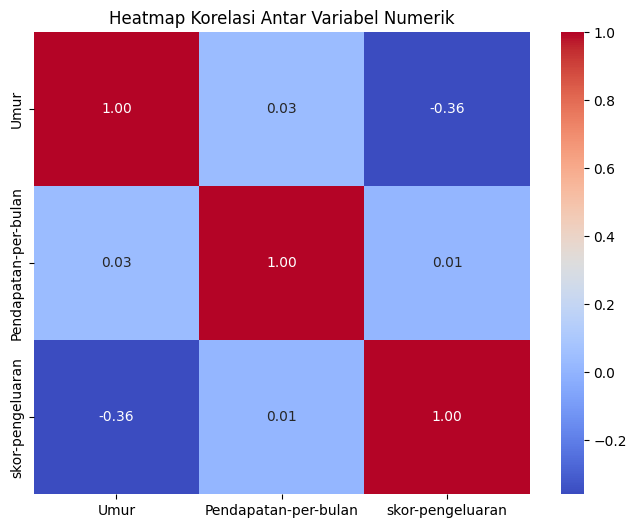

In [ ]:
# Hitung matriks korelasi untuk kolom numerik
correlation_matrix = df[kolom_numerik].corr()

# Buat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

Berdasarkan heatmap korelasi, terlihat bahwa hubungan antar variabel numerik dalam dataset ini cenderung lemah. Korelasi antara umur dan pendapatan per bulan sebesar 0.03 menunjukkan hubungan yang hampir tidak ada. Sementara itu, korelasi antara umur dan skor pengeluaran sebesar -0.36 mengindikasikan hubungan negatif sedang, yang berarti semakin bertambah umur, kecenderungan untuk memiliki skor pengeluaran tinggi semakin menurun. Di sisi lain, pendapatan per bulan dan skor pengeluaran memiliki korelasi sangat lemah (0.01), menunjukkan bahwa tingkat pendapatan tidak berpengaruh signifikan terhadap pola pengeluaran responden. Secara keseluruhan, tidak ada hubungan kuat antar variabel numerik yang dianalisis.

# **Standarisasi Kolom Numerik**

In [ ]:
# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[kolom_numerik].describe().round(1))

# Standarisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(df_std.describe().round(0))

Statistik sebelum Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  200.0                 200.0             200.0
mean    37.5            18672130.7              50.2
std     11.7            10764230.0              25.8
min     18.0                   0.0               1.0
25%     29.0            10860655.0              34.8
50%     36.0            19057377.0              50.0
75%     48.0            25819672.0              73.0
max     60.0            50000000.0              99.0

Hasil Standarisasi

       Umur  Pendapatan-per-bulan  skor-pengeluaran
0  0.980986             -0.517577          0.069299
1 -0.472327              1.390894          1.389283
2  1.151965             -0.250391         -0.357754
3 -1.583684             -0.555747          0.185768
4  0.040607              0.131303         -0.318931

Statistik Hasil Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  200.0                 200.0             200.0
mean     0.0         

Setelah dilakukan standarisasi, setiap variabel kini memiliki rata-rata mendekati 0 dan simpangan baku sekitar 1. Proses ini menyetarakan skala antar kolom sehingga tidak ada variabel yang mendominasi karena perbedaan satuan atau rentang nilai. Data yang telah distandarisasi memiliki sebaran yang seimbang di sekitar nol, dengan nilai berkisar antara -2 hingga 2, sehingga seluruh variabel dapat berkontribusi secara proporsional dalam analisis selanjutnya.

# **Konversi Kategorik Data dengan Label Encoder**

In [ ]:
# Membuat salinan data frame
df_encode = df[kolom_kategorik].copy()

# Melakukan labelEncoder untuk semua kolom kategorik
for col in kolom_kategorik:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor
0              1        1     1      1        4          2
1              1        1     0      1        2          6
2              0        1     1      2        2          3
3              0        0     1      1        3          7
4              1        1     1      2        6          8


Kode ini berfungsi untuk mengubah data kategorik menjadi numerik menggunakan Label Encoder. Langkah pertama dilakukan dengan membuat salinan kolom kategorik agar data asli tetap terjaga. Selanjutnya, setiap kolom diproses dalam sebuah loop untuk menerapkan LabelEncoder, yang mengonversi nilai teks menjadi representasi angka. Sebagai contoh, kategori “Pria” dapat dikodekan menjadi 1 dan “Wanita” menjadi 0. Setelah proses encoding selesai, ditampilkan lima baris awal hasil transformasi, yang menunjukkan bahwa kolom seperti “Jenis Kelamin” dan “Kota” kini telah berbentuk numerik.

# **Persiapan Data Model**

In [ ]:
# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_model.head())

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor      Umur  \
0              1        1     1      1        4          2  0.980986   
1              1        1     0      1        2          6 -0.472327   
2              0        1     1      2        2          3  1.151965   
3              0        0     1      1        3          7 -1.583684   
4              1        1     1      2        6          8  0.040607   

   Pendapatan-per-bulan  skor-pengeluaran  
0             -0.517577          0.069299  
1              1.390894          1.389283  
2             -0.250391         -0.357754  
3             -0.555747          0.185768  
4              0.131303         -0.318931  


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         200 non-null    int64  
 1   Menikah               200 non-null    int64  
 2   Kota                  200 non-null    int64  
 3   Promo                 200 non-null    int64  
 4   HariFav               200 non-null    int64  
 5   FavFlavor             200 non-null    int64  
 6   Umur                  200 non-null    float64
 7   Pendapatan-per-bulan  200 non-null    float64
 8   skor-pengeluaran      200 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 14.2 KB


DataFrame gabungan df berisi kombinasi antara kolom kategorik dan numerik yang telah melalui proses pra-pemrosesan. Kolom kategorik seperti Jenis Kelamin, Menikah, Kota, Promo, HariFav, dan FavFlavor telah dikonversi menjadi nilai numerik melalui proses encoding, sehingga lebih mudah digunakan dalam analisis dan pemodelan.

Sementara itu, kolom numerik seperti Umur, Pendapatan-per-bulan, dan Skor-pengeluaran telah mengalami standarisasi, memastikan seluruh variabel berada pada skala yang setara. Nilai yang hilang pada kolom numerik juga telah digantikan dengan nilai median untuk menjaga konsistensi data.

Selanjutnya, dilakukan analisis korelasi guna mengidentifikasi hubungan antarvariabel. Hasilnya menunjukkan adanya beberapa korelasi signifikan, baik dalam arah positif maupun negatif, yang dapat menjadi dasar dalam analisis lanjutan.

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor      Umur  \
0              1        1     1      1        4          2  0.980986   
1              1        1     0      1        2          6 -0.472327   
2              0        1     1      2        2          3  1.151965   
3              0        0     1      1        3          7 -1.583684   
4              1        1     1      2        6          8  0.040607   

   Pendapatan-per-bulan  skor-pengeluaran  
0             -0.517577          0.069299  
1              1.390894          1.389283  
2             -0.250391         -0.357754  
3             -0.555747          0.185768  
4              0.131303         -0.318931  


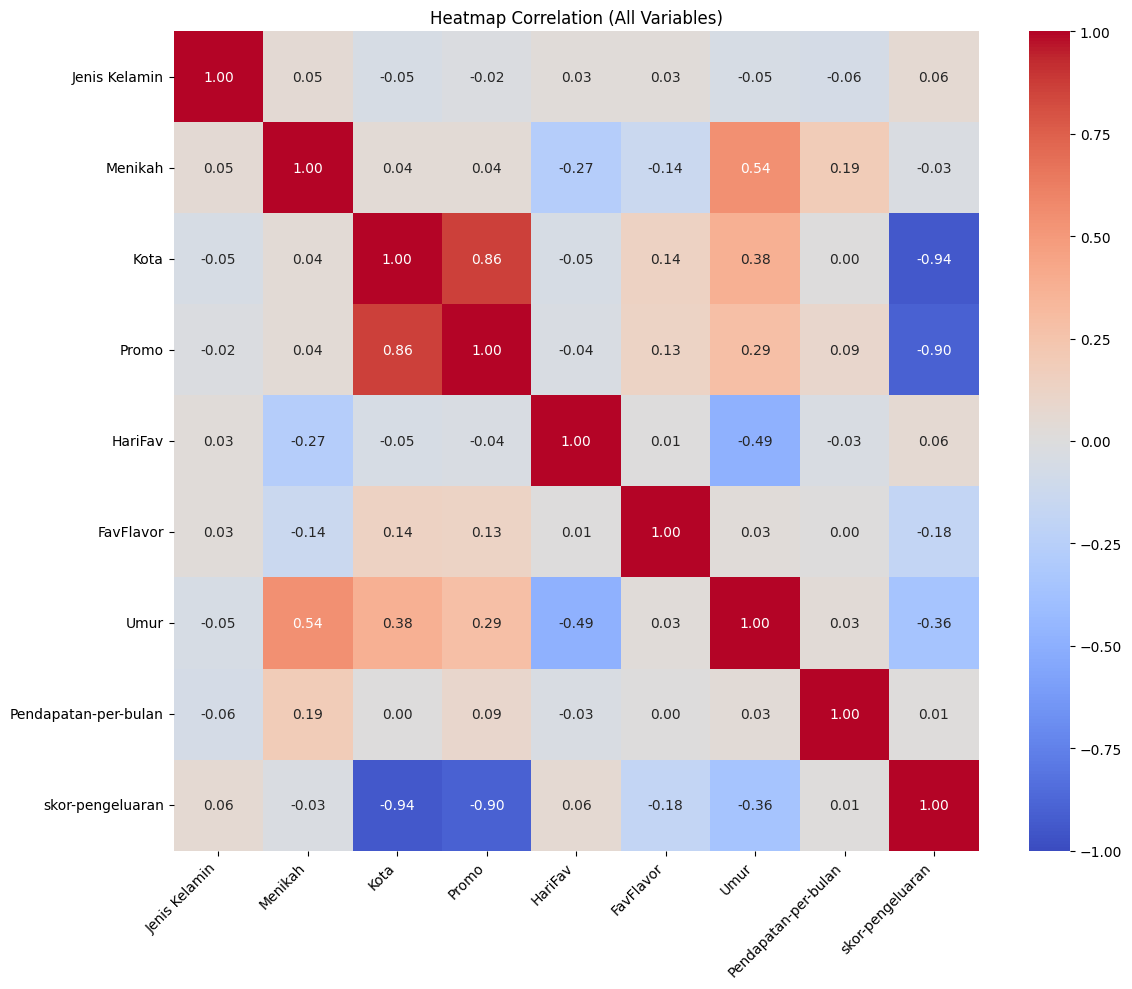

In [ ]:
# Menggabungkan data frame, ensure it's a DataFrame
df_model = pd.merge(df_encode, df_std, left_index=True, right_index=True, how='left')
print(df_model.head())


# Mengganti nilai yang hilang dengan median untuk kolom numerik
numeric_columns = df_model.select_dtypes(include='int64').columns
df_model[numeric_columns] = df_model[numeric_columns].fillna(df_model[numeric_columns].median())

# Hitung korelasi
correlation = df_model.corr()

# Buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Heatmap Correlation (All Variables)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Heatmap di atas menunjukkan hubungan korelasi antarvariabel dalam dataset. Beberapa pola penting dapat diamati dari hasil tersebut. Variabel Kota memiliki korelasi positif yang sangat kuat dengan Promo (0.86), yang menunjukkan bahwa peningkatan nilai pada variabel Kota berkaitan dengan peningkatan nilai pada Promo.

Sebaliknya, terdapat korelasi negatif yang kuat antara Kota dan skor-pengeluaran (-0.94), serta antara Promo dan skor-pengeluaran (-0.90). Hal ini menunjukkan bahwa semakin tinggi nilai Kota dan Promo, semakin rendah skor pengeluaran, yang menggambarkan adanya perbedaan perilaku konsumsi. Selain itu, HariFav juga memiliki korelasi negatif sedang dengan skor-pengeluaran (-0.49).

Variabel Jenis Kelamin dan Menikah memiliki korelasi yang rendah dengan variabel lainnya, menandakan bahwa kedua variabel tersebut tidak berpengaruh besar terhadap faktor lain dalam dataset.

Heatmap memberikan gambaran visual tentang arah dan kekuatan hubungan antarvariabel, di mana warna merah menunjukkan korelasi positif dan warna biru menunjukkan korelasi negatif.


# **Clustering**

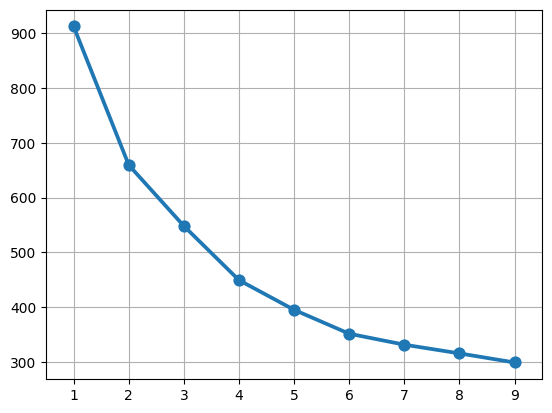

In [ ]:
# Melakukan Iterasi untuk mendapatkan nilai Cost
cost = {}
for k in range(1,10):
  kproto_clustering = KPrototypes(n_clusters = k, random_state = 0)
  kproto_clustering.fit_predict(df_model, categorical = [0,1,2,3,4,5])
  cost[k] = kproto_clustering.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

Berdasarkan grafik **Elbow Plot** di atas, terlihat bahwa nilai *cost* menurun tajam dari jumlah klaster 1 hingga sekitar klaster ke-3 atau ke-4, kemudian penurunannya mulai melambat dan cenderung stabil setelahnya. Pola ini menunjukkan bahwa titik siku (*elbow point*) berada di sekitar **k = 3 atau 4**, yang menandakan jumlah klaster optimal. Dengan demikian, pemilihan **3 atau 4 klaster** akan memberikan keseimbangan terbaik antara kompleksitas model dan efisiensi pemisahan data.


**Membuat Model**

In [ ]:
kproto_clustering = KPrototypes(n_clusters = 4, random_state = 0)
kproto_clustering = kproto_clustering.fit(df_model, categorical = [0,1,2,3])

#Save Model
pickle.dump(kproto_clustering, open('cluster.pkl', 'wb'))

**Menggunakan Model**

In [ ]:
  # Menentukan segmen tiap pelanggan
clusters = kproto_clustering.predict(df_model, categorical = [0,1,2,3])
print('Segmen Pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final = df.copy()
df_final['cluster'] = clusters
print(df_final.head(15))

Segmen Pelanggan: [3 0 3 0 1 2 1 2 1 1 1 3 1 3 0 3 3 0 3 0 1 1 3 3 0 2 2 3 1 1 2 3 0 1 2 1 2
 2 0 1 2 2 3 2 2 0 2 0 0 2 0 2 0 3 3 3 3 2 3 3 1 3 3 0 0 3 3 0 2 1 3 3 3 3
 1 0 3 3 2 1 2 3 2 1 3 0 3 1 3 2 0 0 3 2 3 0 0 3 3 0 3 3 1 3 3 1 2 1 1 0 1
 2 1 3 3 3 0 3 2 2 3 0 2 1 3 2 0 0 1 0 3 2 0 1 1 3 1 1 1 2 3 2 1 0 2 0 1 3
 1 0 2 2 0 3 2 2 3 2 1 3 2 1 2 3 2 3 1 1 1 3 1 0 3 1 1 1 1 1 1 3 3 2 3 1 1
 3 1 2 3 0 3 2 1 3 3 2 0 1 2 0]

     ID Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0   101        Wanita    49              13114754                52       1   
1   102        Wanita    32              33606557                86       1   
2   103          Pria    51              15983606                41       1   
3   104          Pria    19              12704918                55       0   
4   105        Wanita    38              20081967                42       1   
5   106        Wanita    33              29098360                95       1   
6   107          Pria

**Menampilkan Cluster Tiap Pelanggan**

In [ ]:
# Menampilkan data pelanggan berdasarkan clusternya
for i in range (0,5):
    print('\nPelanggan Cluster: {}\n'.format(i))
    print(df_final[df_final['cluster'] == i])


Pelanggan Cluster: 0

      ID Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
1    102        Wanita    32              33606557                86       1   
3    104          Pria    19              12704918                55       0   
14   115        Wanita    58               2049180                15       1   
17   118        Wanita    32              25000000                87       1   
19   120        Wanita    49               9836065                28       1   
24   125          Pria    39              22950819                75       1   
32   133        Wanita    36              28688524                75       1   
38   139          Pria    48              18442622                49       1   
45   146          Pria    59              15983606                47       1   
47   148        Wanita    36              29508196                10       1   
48   149        Wanita    40              18442622                40       1   
50   151         

**Visualisasi Hasil Clustering**

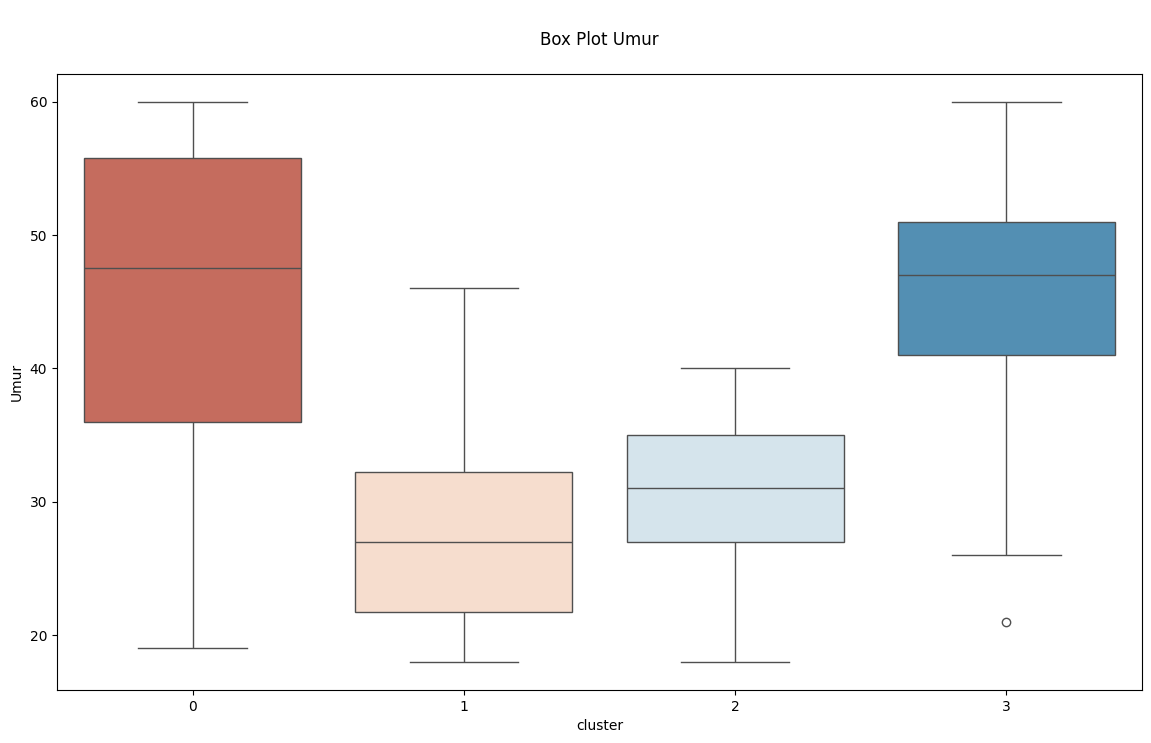

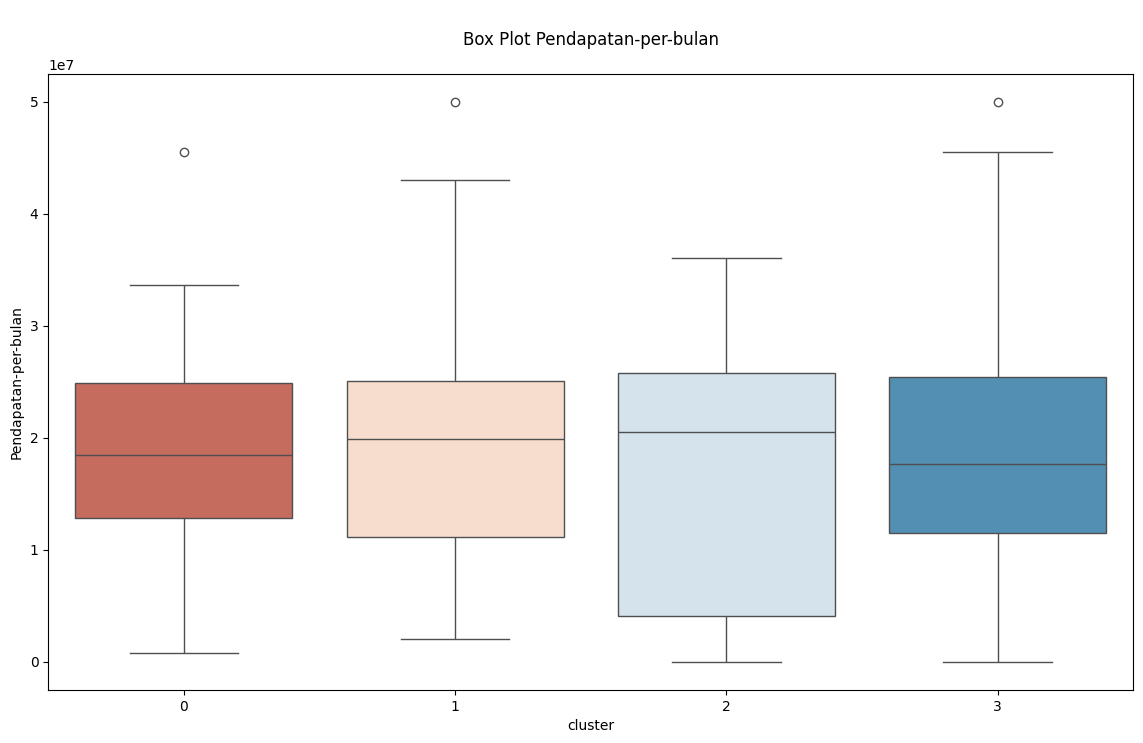

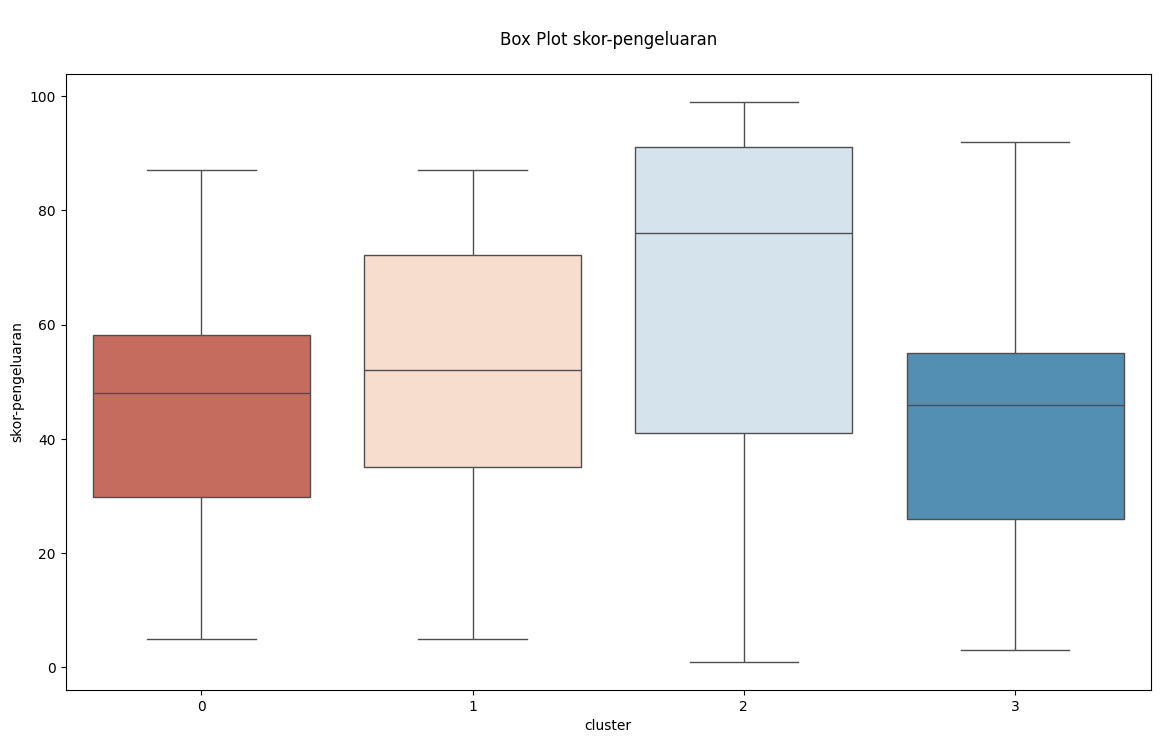

In [ ]:
for i in kolom_numerik:
    plt.figure(figsize=(14,8))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final, palette= 'RdBu')
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()


*   **Distribusi Umur**

Hasil analisis menunjukkan bahwa setiap cluster memiliki karakteristik umur pelanggan yang berbeda. Cluster 0 dan Cluster 3 memperlihatkan sebaran umur yang paling luas dengan median umur relatif tinggi, menandakan dominasi pelanggan berumur lebih dewasa. Cluster 1 didominasi oleh pelanggan yang lebih muda, dengan rentang umur sempit dan tingkat variasi rendah. Sementara itu, Cluster 2 memiliki distribusi umur yang lebih terpusat dengan median sedikit lebih rendah dibandingkan Cluster 0 dan 3, namun tetap lebih tinggi daripada Cluster 1.

* **Distribusi Pendapatan per Bulan**

Perbedaan juga terlihat dari distribusi pendapatan. Cluster 0 dan Cluster 3 memiliki variasi pendapatan yang lebih besar, dengan beberapa pelanggan berpendapatan jauh di atas rata-rata, mengindikasikan keberadaan kelompok dengan daya beli tinggi. Cluster 1 dan Cluster 2 memiliki rentang pendapatan yang lebih terpusat di sekitar nilai tengah, meskipun Cluster 1 masih menyertakan beberapa individu dengan pendapatan tinggi. Sementara itu, Cluster 2 tampak paling stabil karena tidak terdapat nilai ekstrem yang signifikan, menandakan distribusi pendapatan yang lebih merata di dalam kelompok ini.

* **Distribusi Skor Pengeluaran**

Dari sisi skor pengeluaran, terlihat perbedaan yang cukup jelas antarcluster. Cluster 0 dan Cluster 3 menunjukkan variasi pengeluaran yang lebih besar, mencerminkan adanya perbedaan perilaku konsumsi di antara pelanggan dalam kelompok tersebut. Cluster 1 dan Cluster 2 memiliki pola pengeluaran yang lebih seragam, dengan Cluster 2 menempati posisi tertinggi dalam rata-rata skor pengeluaran, menandakan kecenderungan pelanggan di kelompok ini untuk lebih aktif berbelanja. Sementara itu, Cluster 3 menunjukkan pola pengeluaran yang lebih stabil dan merata, tanpa adanya nilai yang terlalu ekstrem.

**Visualisasi Hasil Clustering-Count Plot**

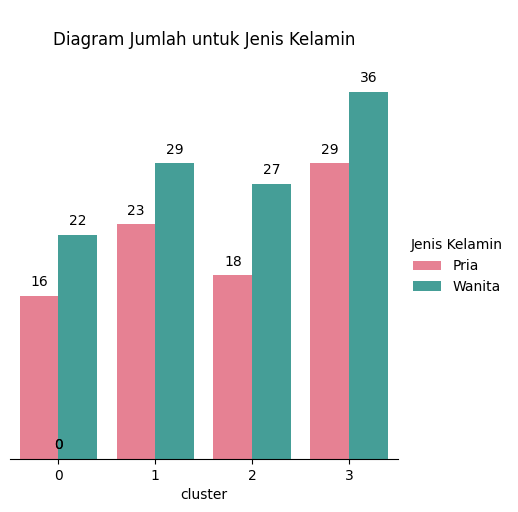

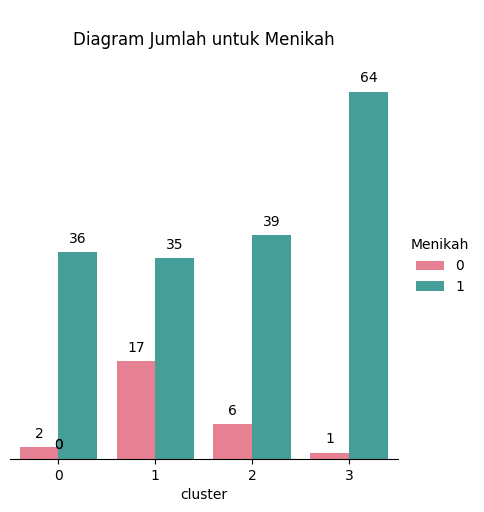

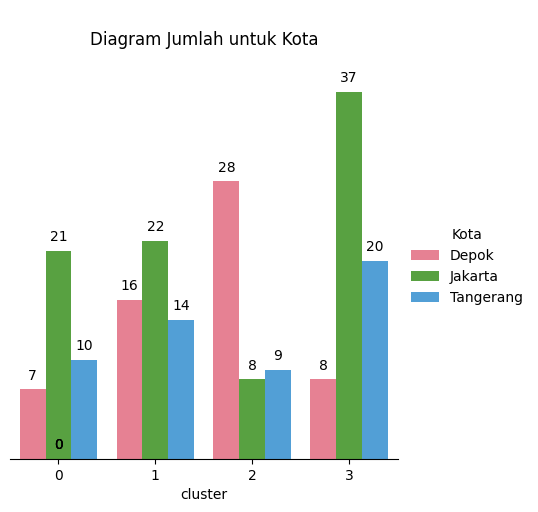

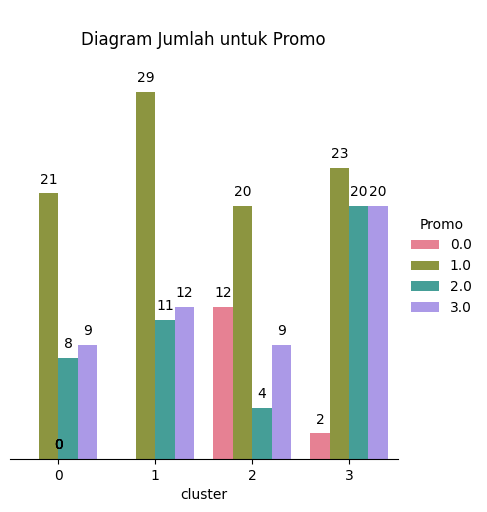

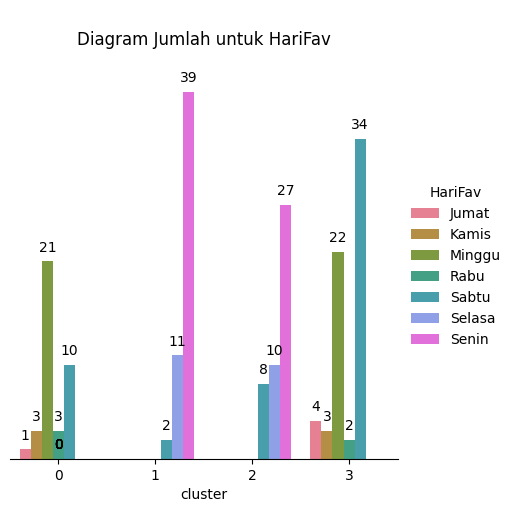

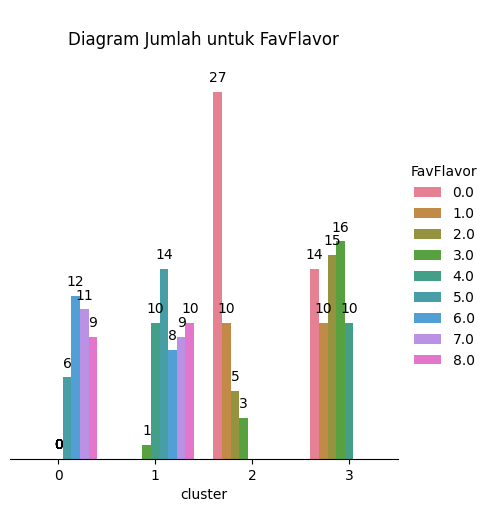

In [ ]:
# Melakukan perulangan pada setiap kolom kategorik
for i in kolom_kategorik:
    plt.figure(figsize=(5, 5))

    # Membuat countplot antara cluster dan variabel kategorik dengan palet pastel
    ax = sns.countplot(data=df_final, x='cluster', hue=i, palette='husl')
    plt.title(f'\nDiagram Jumlah untuk {i}\n', fontsize=12)
    ax.legend(title=i, loc='center left', bbox_to_anchor=(1.02, 0.5),
              borderaxespad=0, frameon=False)

    # Menambahkan anotasi pada setiap batang
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points')

    # Merapikan tampilan grafik
    sns.despine(right=True, top=True, left=True)
    ax.axes.yaxis.set_visible(False)
    plt.show()





1.  **Jenis Kelamin**

Insight:

Cluster 3 didominasi oleh responden perempuan, sedangkan Cluster 0 lebih banyak diisi oleh responden laki-laki. Perbedaan ini menunjukkan adanya kecenderungan preferensi produk berdasarkan gender yang dapat dimanfaatkan untuk strategi pemasaran.

Rekomendasi:

MixITup dapat menerapkan pendekatan pemasaran yang disesuaikan dengan karakteristik tiap segmen. Untuk pasar dengan dominasi perempuan, fokus dapat diarahkan pada varian rasa yang lebih manis, kemasan menarik, serta promosi bertema feminin. Sementara itu, pada segmen dengan dominasi laki-laki, strategi dapat menonjolkan produk dengan cita rasa lebih kuat seperti kopi atau boba. Selain itu, MixITup juga dapat mempertimbangkan kampanye digital bertarget gender dan pengaturan distribusi produk berdasarkan profil demografis wilayah.

2.   **Menikah**

Insight:

Cluster 3 didominasi oleh responden yang sudah menikah, sementara Cluster 0 juga memiliki mayoritas pelanggan yang menikah, meskipun dengan selisih yang tidak terlalu besar. Pola ini menunjukkan bahwa sebagian besar pelanggan MixITup berasal dari kelompok yang sudah berkeluarga.

Rekomendasi:

MixITup dapat memanfaatkan temuan ini dengan menerapkan strategi pemasaran yang menonjolkan nilai kebersamaan dan momen bersama keluarga. Pendekatan ini dapat diwujudkan melalui penawaran paket keluarga, menu sharing, atau promo bundling untuk dua orang. Selain itu, MixITup dapat menghadirkan program loyalitas keluarga serta kampanye bertema “family time” di media sosial untuk memperkuat citra merek sebagai pilihan minuman yang cocok dinikmati bersama orang terdekat. Pendekatan ini berpotensi meningkatkan daya tarik bagi pelanggan yang datang bersama pasangan atau keluarga, terutama di area perkotaan tempat MixITup memiliki pangsa pasar yang besar.



3.   **Kota**

Insight:

Cluster 3 didominasi oleh responden dari kategori kota “2”, yang kemungkinan mewakili kota besar seperti Jakarta, dengan jumlah 37 orang. Sebaliknya, Cluster 0 lebih banyak berasal dari kategori kota “0”, yang mencerminkan kota kecil atau wilayah pinggiran dengan 21 responden. Hal ini menunjukkan adanya perbedaan karakteristik pelanggan antara wilayah perkotaan dan daerah yang lebih kecil.

Rekomendasi:

MixITup dapat memprioritaskan ekspansi dan promosi di kota besar seperti Jakarta, Surabaya, dan Bandung, yang memiliki potensi pasar tinggi serta daya beli lebih kuat. Untuk wilayah kecil atau pinggiran, strategi dapat difokuskan pada produk dengan harga lebih terjangkau, kemasan ekonomis, atau program promosi lokal guna menarik minat konsumen dengan daya beli yang lebih beragam.

4.   **Promo**

Insight:

Cluster 0 dan Cluster 3 didominasi oleh responden yang kurang tertarik pada promosi, sedangkan Cluster 1 dan Cluster 2 menunjukkan minat yang lebih bervariasi terhadap penawaran promo. Hal ini mencerminkan bahwa efektivitas promosi berbeda pada tiap segmen pelanggan.

Rekomendasi:

MixITup sebaiknya menyesuaikan strategi promosinya berdasarkan karakteristik cluster. Untuk segmen di kota besar seperti Cluster 3, fokus dapat diberikan pada peningkatan citra merek dan kualitas produk melalui kampanye branding atau kolaborasi dengan influencer. Sementara itu, untuk segmen di wilayah kecil atau pinggiran, strategi berbasis diskon, promo bundling, atau loyalty program dapat diterapkan untuk meningkatkan daya tarik dan memperluas jangkauan pasar.


5.   **HariFav**

Insight:

Cluster 3 memiliki kecenderungan kuat terhadap hari dengan kategori “2”, yang kemungkinan mewakili akhir pekan atau hari-hari spesial. Sebaliknya, Cluster 0 lebih banyak memilih kategori “0”, yang bisa menggambarkan hari-hari biasa. Pola ini menunjukkan adanya perbedaan perilaku kunjungan pelanggan berdasarkan waktu atau hari tertentu.

Rekomendasi:

MixITup dapat melakukan strategi pemasaran berbasis waktu dengan menyesuaikan promosi sesuai pola kunjungan pelanggan. Di kota besar, promosi akhir pekan seperti “Weekend Deal” atau diskon spesial pada jam ramai dapat meningkatkan penjualan. Sedangkan di wilayah kecil, penerapan promo harian atau potongan harga sepanjang minggu dapat membantu menjaga stabilitas penjualan dan menarik pelanggan secara konsisten.

6.  **FavFlavor**

Insight:

Cluster 0 menunjukkan preferensi kuat terhadap rasa pada kategori “0”, yang mewakili varian rasa populer yaitu vanila. Sementara itu, Cluster 3 lebih menyukai rasa pada kategori “6”, yang mewakili rasa Caramel Pecan. Hal ini menunjukkan adanya perbedaan selera pelanggan antarcluster.

Rekomendasi:

MixITup dapat mengembangkan strategi produk yang menyesuaikan karakteristik tiap segmen. Di kota besar, fokus dapat diarahkan pada peluncuran varian rasa baru dan edisi terbatas untuk menarik pelanggan yang gemar mencoba hal baru. Sementara di kota kecil atau pinggiran, strategi mempertahankan rasa klasik yang sudah dikenal dan disukai akan lebih efektif untuk menjaga loyalitas pelanggan dan kestabilan penjualan.


**Memberi nama pada setiap kluster**

In [ ]:
# Mapping nama kolom
df_final['Segmen'] = df_final['cluster'].map({
0: 'Regular Member',
1: 'Premium Member',
2: 'VIP Member',
3: 'Elite Member'
})

print(df_final.info())
print(df_final.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ID                           200 non-null    int64   
 1   Jenis Kelamin                200 non-null    category
 2   Umur                         200 non-null    int64   
 3   Pendapatan-per-bulan         200 non-null    int64   
 4   skor-pengeluaran             200 non-null    int64   
 5   Menikah                      200 non-null    category
 6   Kota                         200 non-null    category
 7   Promo                        200 non-null    category
 8   HariFav                      200 non-null    category
 9   FavFlavor                    200 non-null    category
 10  Pendapatan-per-bulan-capped  200 non-null    float64 
 11  cluster                      200 non-null    uint16  
 12  Segmen                       200 non-null    object  
dtypes: ca

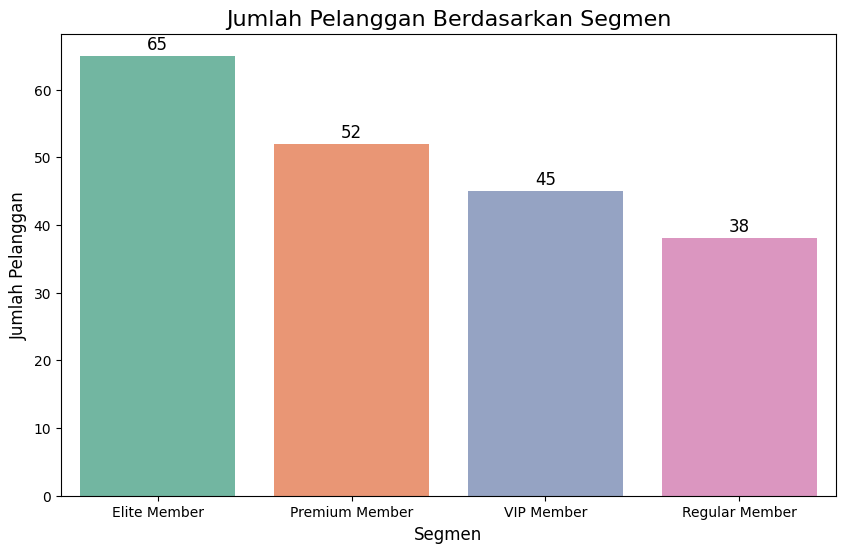

In [ ]:
# Menyiapkan ukuran gambar agar lebih besar
plt.figure(figsize=(10, 6))

# Membuat barplot untuk menampilkan jumlah pelanggan berdasarkan segmen
sns.barplot(x=df_final['Segmen'].value_counts().index,
            y=df_final['Segmen'].value_counts().values,
            palette='Set2')

# Memberikan judul dan label pada grafik
plt.title('Jumlah Pelanggan Berdasarkan Segmen', fontsize=16)
plt.xlabel('Segmen', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Menambahkan jumlah total di atas setiap bar
total_counts = df_final['Segmen'].value_counts()
for i, count in enumerate(total_counts.values):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12, color='black')

# Menampilkan plot
plt.show()

**Insight:**

1. **Elite Member**

Segmen Elite Member memiliki jumlah pelanggan terbanyak, yaitu sebanyak 65 orang, menjadikannya kelompok dengan pangsa pasar terbesar di antara seluruh kategori keanggotaan. Hal ini menunjukkan bahwa program Elite Member memberikan manfaat yang dianggap paling menarik bagi pelanggan.

Rekomendasi:

MixITup perlu menjaga loyalitas pelanggan Elite dengan memberikan keuntungan eksklusif, seperti poin tambahan, hadiah khusus, atau akses lebih awal ke produk baru. Selain itu, perusahaan bisa melakukan analisis sederhana untuk memahami kebutuhan anggota Elite agar strategi promosi lebih tepat.

2. **Premium Member dan VIP Member**

Segmen Premium Member memiliki 52 pelanggan, sementara VIP Member berjumlah 45 pelanggan. Meskipun tidak sebanyak Elite Member, kedua segmen ini tetap memiliki peran penting karena kontribusinya cukup besar terhadap total pelanggan.

Rekomendasi:

Untuk kedua segmen ini, MixITup dapat mengadakan promosi dan program loyalitas yang mendorong peningkatan status keanggotaan. Contohnya, memberikan kesempatan upgrade gratis dari Premium ke VIP atau dari VIP ke Elite melalui sistem poin atau periode pembelian tertentu. Strategi ini dapat meningkatkan loyalitas sekaligus memperkuat motivasi pelanggan untuk tetap aktif berbelanja.

3. **Regular Member**

Segmen Regular Member memiliki jumlah pelanggan paling sedikit, yaitu 38 orang. Hal ini bisa mengindikasikan bahwa program Regular kurang menarik dibandingkan dengan segmen di atasnya atau manfaat yang diberikan tidak cukup membedakan.

Rekomendasi:

MixITup dapat melakukan evaluasi terhadap program Regular Member untuk memahami penyebab rendahnya minat pelanggan. Perusahaan bisa mempertimbangkan untuk menambahkan insentif seperti diskon khusus, voucher pembelian, atau penawaran eksklusif bagi anggota baru. Selain itu, strategi promosi yang mendorong pelanggan Regular untuk naik ke tingkat Premium atau VIP juga dapat meningkatkan retensi dan nilai pelanggan jangka panjang.

# **K-Means**

In [ ]:
cols = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cols])

Untuk menggunakan K-Means kami menggunakan seluruh data numerik yang ada yaitu 'Umur', 'Pendapatan-per-bulan', dan 'skor-pengeluaran'. Kemudian dilakukan standarisasi sebelum melakukan clustering menggunakan K-means

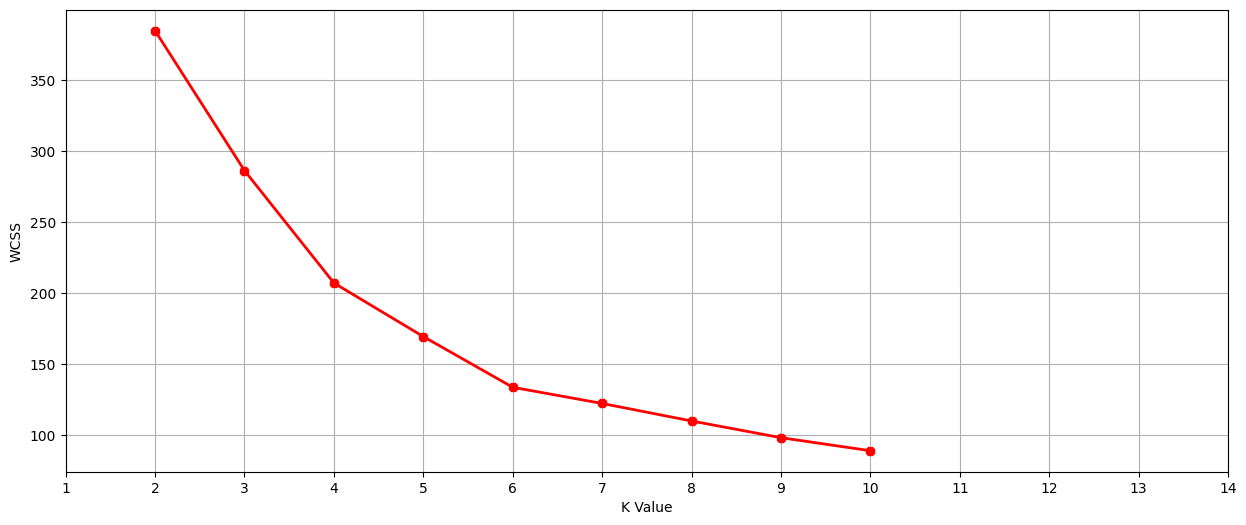

In [ ]:
wcss = []
for k in range(2, 11):
    kmeans2 = KMeans(n_clusters=k, random_state=42, init="k-means++")
    kmeans2.fit(X_scaled)
    wcss.append(kmeans2.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(2,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()

Kemudian untuk menemukan nilai K yang sesuai untuk clustering, maka dibuat visualisasi wcss dengan melihat perubahan dari k = 2 hingga k = 10, tidak dari 1 dikarenakan k = 1 sama saja dengan menggunakan seluruh data yang ada kedalam satu cluster. Kemudian untuk menemukan siku kami melakukan beberapa kali percobaan dimulai dari k = 4 karena dinilai membentuk suatu sudut lancip jika dibandingkan dengan yang lain, dilanjutkan dengan k =5, k = 6, k = 7, dan k = 8. Dari hasil yang didapatkan nilai silhoutte berada paling tinggi di k = 7 dengan inertia yang tidak terlalu dekat juga sehingga tidak overfitting. Maka dari itu berdasarkan hasil tersebut kami hanya menampilkan k = 7, berikut distribusi cluster dan persebaran data yang dihasilkan.

array([2, 6, 2, 3, 3, 6, 3, 0, 3, 3], dtype=int32)

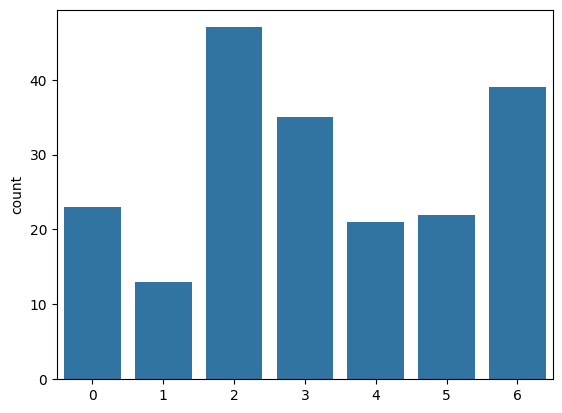

In [ ]:
from sklearn import cluster, datasets
random_state2 = 0
k = 7
kmPP2 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=400, tol=0.0001, random_state = random_state2)
kmPP2.fit(X_scaled)
C_kmpp2 = kmPP2.predict(X_scaled)

sns.countplot(x=C_kmpp2)
C_kmpp2[:10]

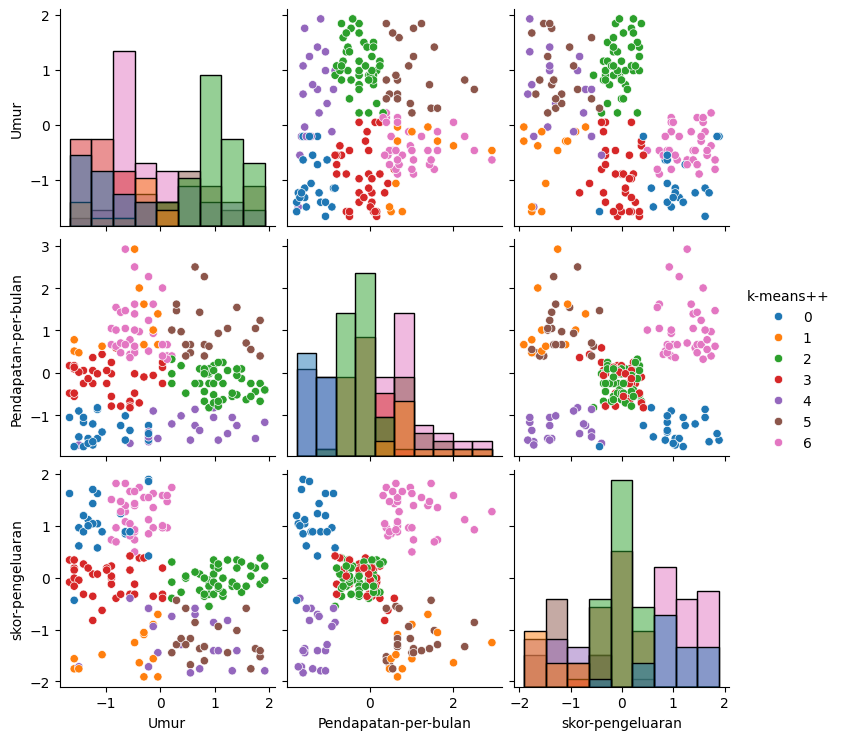

In [ ]:
import pandas as pd

X_scaled = pd.DataFrame(X_scaled, columns=cols)
X_scaled['k-means++'] = C_kmpp2
g = sns.pairplot(X_scaled[[ 'Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran','k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10")

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, kmPP2.labels_)

np.float64(0.61745642537375)

In [ ]:
print("Inertia:", kmPP2.inertia_)
print("Number of iterations:", kmPP2.n_iter_)

Inertia: 118.81338541718011
Number of iterations: 12



### Interpretasi berdasarkan persebaran data pada visualisasi pairplot
*   Cluster 0 : Menunjukan Umur muda, pendapatan rendah hingga menengah, skor pengeluaran rendah.
*   Cluster 1 : Umur menengah, pendapatan menengah, pengeluaran cukup tinggi.
*   Cluster 2 : Umur menengah, pendapatan tinggi, pengeluaran tinggi.
*   Cluster 3 : Umur muda, pendapatan sedang, pengeluaran sedang.
*   Cluster 4 : Umur tua, pendapatan rendah, pengeluaran rendah.
*   Cluster 5 : Umur menengah hingga tua, pendapatan tinggi, tapi pengeluaran rendah.
*   Cluster 6 : Umur muda, pendapatan tinggi, pengeluaran tinggi.










### Strategi berdasarkan Interpretasi diagram batang


Cluster 2 menjadi prioritas utama karena memiliki jumlah pelanggan terbanyak dibandingkan cluster lainnya. Berdasarkan hasil analisis, kelompok ini didominasi oleh pelanggan dengan rentang usia 30–48 tahun, yang umumnya merupakan pekerja aktif dengan pendapatan stabil dan pola pengeluaran tinggi.

Tingkat pengeluaran yang tinggi menunjukkan bahwa pelanggan dalam cluster ini cenderung melakukan pembelian dengan kuantitas besar dalam satu transaksi, bukan karena impulsif terhadap tren, melainkan karena faktor praktis dan efisiensi waktu. Hal ini selaras dengan karakteristik usia produktif yang biasanya memiliki kesibukan tinggi dan lebih memilih solusi cepat serta bernilai ekonomis.

Untuk mempertahankan loyalitas pelanggan pada cluster ini, strategi yang disarankan adalah dengan menghadirkan program membership eksklusif yang memberikan nilai tambah nyata, seperti:

* Diskon dan bundling hemat untuk pembelian dalam jumlah besar.

* Paket langganan dengan pengiriman rutin (contohnya paket mingguan/bulanan).

* Hadiah spesial saat ulang tahun atau momen tertentu, guna meningkatkan kedekatan emosional.

Pendekatan ini tidak hanya menjaga kepuasan pelanggan, tetapi juga memperkuat hubungan jangka panjang dengan segmen paling berkontribusi terhadap pendapatan perusahaan.

Kemudian difokuskan pada pelanggan dengan kategori usia muda karena distribusi setelah cluster 2 terbanyak diduduki oleh cluster-cluster dengan usia muda. Untuk menarik minat pelanggan dari cluster usia muda, strategi yang efektif adalah dengan menawarkan inovasi produk berupa menu baru, unik, dan kekinian. Kelompok usia muda cenderung memiliki karakteristik sebagai pengikut tren (trend followers) dan mencari pengalaman konsumsi yang berbeda, bukan hanya sekadar membeli produk yang sama berulang kali.

Mereka juga lebih tertarik pada hal-hal baru yang memberikan pengalaman emosional atau sosial, misalnya menu yang sedang viral di media sosial, produk dengan tampilan menarik, atau rasa yang tidak biasa namun menggugah rasa penasaran.

Oleh karena itu, perusahaan dapat menerapkan strategi berikut:

* Meluncurkan menu musiman (seasonal menu) yang hanya tersedia pada periode tertentu, seperti varian rasa edisi liburan atau kolaborasi spesial.

* Menyesuaikan tampilan dan promosi produk agar relevan dengan tren digital dan media sosial, misalnya melalui kampanye yang mudah dibagikan di platform seperti Instagram atau TikTok.

* Memberikan promo khusus untuk produk baru, seperti harga perkenalan atau diskon untuk pembelian kedua, guna mendorong eksplorasi dan pembelian berulang.






In [ ]:
df.describe()

,ID,Umur,Pendapatan-per-bulan,skor-pengeluaran,Pendapatan-per-bulan-capped
count,200.000000,200.000000,2.000000e+02,200.000000,2.000000e+02
mean,200.500000,37.525000,1.867213e+07,50.215000,1.865471e+07
std,57.879185,11.726763,1.076423e+07,25.822525,1.071457e+07
min,101.000000,18.000000,0.000000e+00,1.000000,0.000000e+00
25%,150.750000,29.000000,1.086066e+07,34.750000,1.086066e+07
50%,200.500000,36.000000,1.905738e+07,50.000000,1.905738e+07
75%,250.250000,48.000000,2.581967e+07,73.000000,2.581967e+07
max,300.000000,60.000000,5.000000e+07,99.000000,4.825820e+07


# **Hierarchical Clustering**

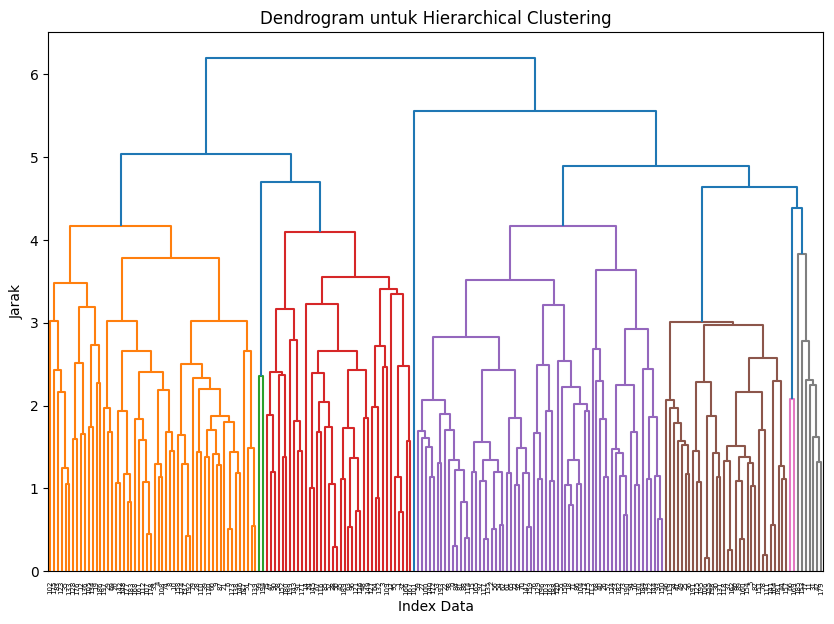

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# 1. Persiapkan Data
X, _ = make_blobs(n_samples=50, centers=3, cluster_std=0.60, random_state=0)

# 2. Hitung Jarak dan Lakukan Clustering
# Menggunakan metode 'average' untuk linkage
Z = linkage(df_model, method='average')

# 3. Visualisasikan Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram untuk Hierarchical Clustering')
plt.xlabel('Index Data')
plt.ylabel('Jarak')
plt.show()

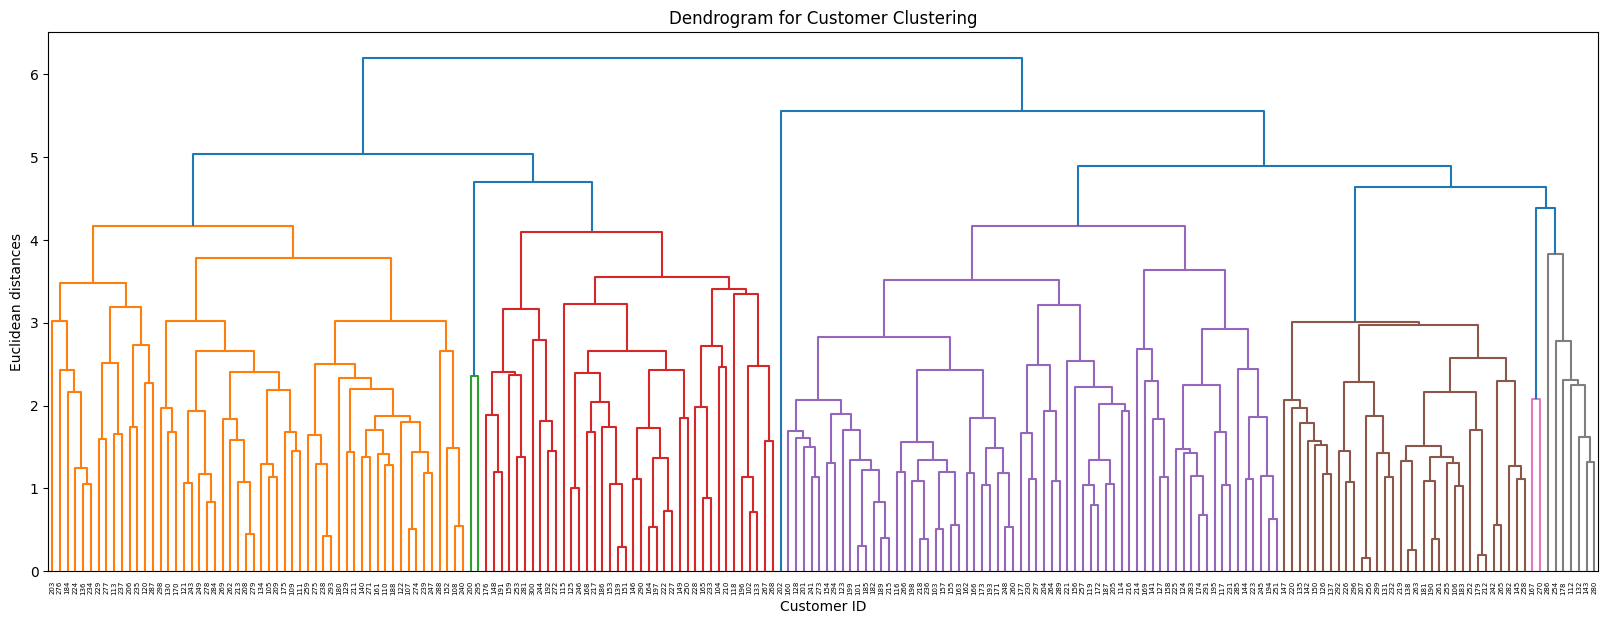

In [ ]:
# Perform hierarchical clustering
Z = linkage(df_model, method='average')

# Plot the dendrogram
plt.figure(figsize=(20, 7))
dendrogram(Z, labels=df['ID'].values, leaf_rotation=90)
plt.title('Dendrogram for Customer Clustering')
plt.xlabel('Customer ID')
plt.ylabel('Euclidean distances')
plt.show()

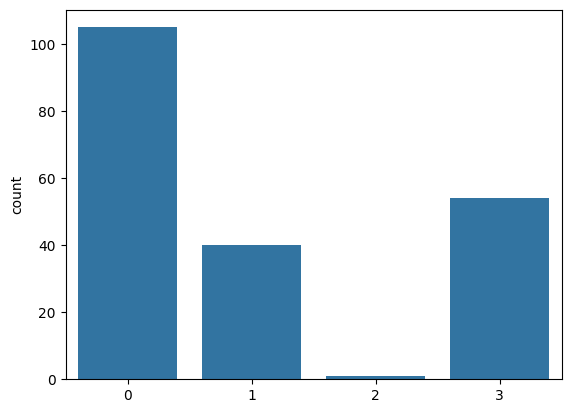

In [ ]:
# Remove the 'affinity' parameter since it's not needed for 'average' linkage
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='average')
hierarchical.fit(df_model)
C_h = hierarchical.labels_.astype(int)
# Assuming you intended to use countplot
sns.countplot(x=C_h)
plt.show()

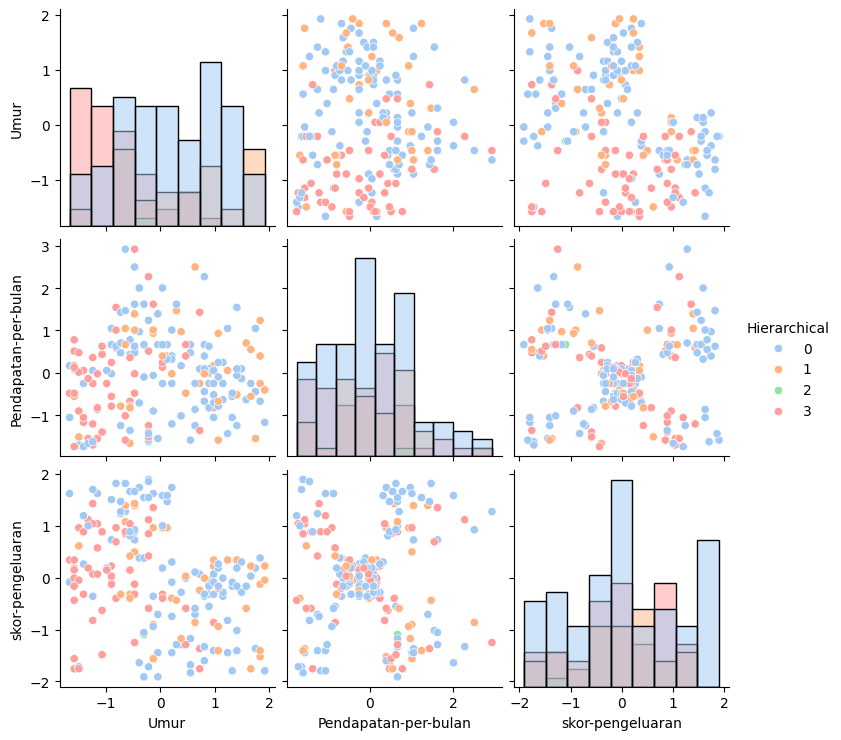

In [ ]:
df_model['Hierarchical'] = C_h
g = sns.pairplot(df_model[['Umur','Pendapatan-per-bulan','skor-pengeluaran', 'Hierarchical']], \
                 hue="Hierarchical", diag_kind="hist", palette="pastel")

1. **Analisis Distribusi Cluster**

* Cluster 0 (Biru)

Memiliki sebaran paling luas di semua variabel, terutama Pendapatan per Bulan dan Skor Pengeluaran. Ini menunjukkan bahwa anggota cluster ini memiliki karakteristik yang beragam, mulai dari pendapatan dan pengeluaran rendah hingga tinggi.

* Cluster 1 (Oranye)

Tersebar merata di seluruh variabel tanpa kecenderungan kuat pada salah satu aspek tertentu. Hal ini menandakan bahwa pelanggan di cluster ini memiliki profil yang relatif seimbang.

* Cluster 2 (Hijau)

Beranggotakan pelanggan dengan nilai variabel yang berada di kisaran tengah. Artinya, pendapatan dan skor pengeluaran mereka tidak terlalu tinggi maupun terlalu rendah, menunjukkan kelompok pelanggan dengan perilaku konsumsi moderat.

* Cluster 3 (Merah Muda)

Dominan pada kisaran rendah di semua variabel, terutama pada Pendapatan per Bulan dan Skor Pengeluaran. Cluster ini merepresentasikan pelanggan dengan daya beli yang lebih rendah.

2. **Korelasi Antarvariabel**

Terdapat hubungan yang cukup kuat antara Pendapatan per Bulan dan Skor Pengeluaran, terlihat dari pemisahan cluster yang jelas pada scatter plot kedua variabel tersebut. Sebaliknya, variabel Umur tidak menunjukkan pengaruh yang signifikan dalam membedakan cluster, karena persebarannya relatif tumpang tindih di semua kelompok.

3. **Pola Pendapatan dan Pengeluaran**

Pelanggan dengan pendapatan tinggi (terutama pada Cluster 0) juga menunjukkan Skor Pengeluaran yang tinggi. Pola ini memperlihatkan adanya keterkaitan positif antara tingkat pendapatan dan perilaku belanja pelanggan dalam data yang dianalisis.

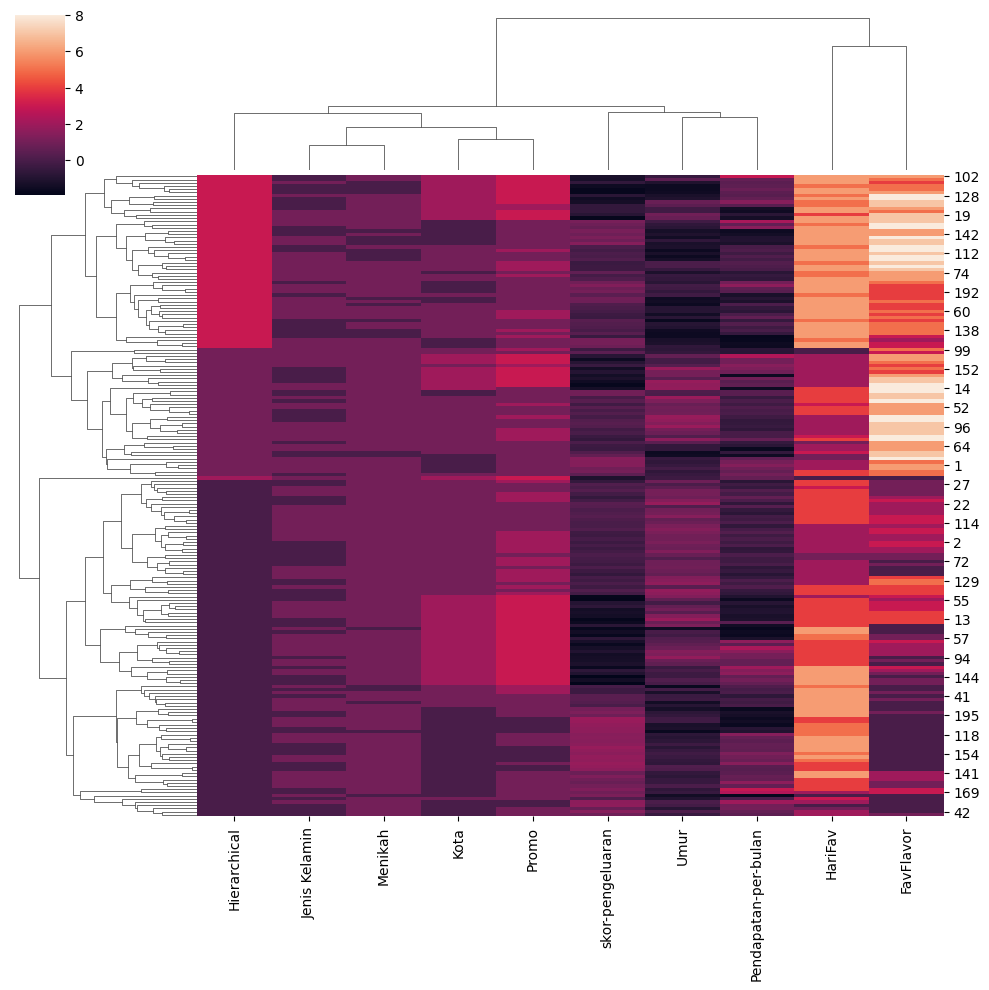

In [ ]:
g = sns.clustermap(df_model, method="average", metric="euclidean")

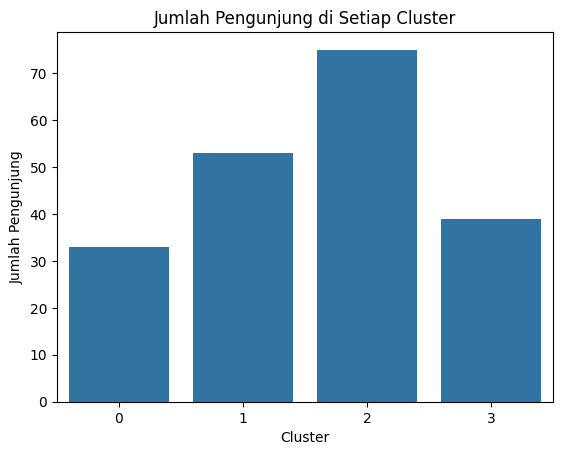

[2 3 2 1 2 3 1 1 1 1]


In [ ]:
# Select numeric columns (e.g., 'Umur' and 'Pendapatan-per-bulan')
kolom_num = ['Umur', 'Pendapatan-per-bulan']  # Updated with correct column names from df

# If 'Skor Pengeluaran' exists in your DataFrame, include it as well:
# kolom_num = ['Umur', 'Pendapatan-per-bulan', 'Skor Pengeluaran']

kolom_num = df_model[kolom_numerik]

# Initialize Agglomerative Clustering model
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='average', metric='euclidean')
hierarchical.fit(kolom_num)  # Use numeric data here

# Assign the cluster labels to the 'labels' variable
labels = hierarchical.labels_  # This line was previously commented out, causing the error.

df_model['hierarchical'] = labels  # Now 'labels' is defined and can be used.

# Get cluster labels
C_h = hierarchical.labels_.astype(int)

# Visualize the number of data points in each cluster
sns.countplot(x=C_h)
plt.title('Jumlah Pengunjung di Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pengunjung')
plt.show()

# Display the first 10 cluster labels
print(C_h[:10])

**Insight:**

Berdasarkan diagram di atas, terlihat bahwa Cluster 2 memiliki jumlah pengunjung paling banyak dibandingkan cluster lainnya. Hal ini menunjukkan bahwa karakteristik pelanggan di cluster ini paling dominan dalam dataset. Cluster 1 berada di posisi kedua dengan jumlah pengunjung yang juga cukup tinggi, menunjukkan potensi pertumbuhan yang baik. Sementara itu, Cluster 3 memiliki jumlah pengunjung yang sedang, dan Cluster 0 menjadi cluster dengan jumlah pengunjung paling sedikit.

**Rekomendasi:**

1. Fokus pada Retensi Pelanggan di Cluster 2

MixITup dapat memprioritaskan pelanggan di Cluster 2 karena kelompok ini memiliki jumlah pengunjung tertinggi. Strategi yang dapat diterapkan antara lain memberikan program loyalitas eksklusif, voucher khusus anggota tetap, atau event apresiasi pelanggan untuk menjaga tingkat kunjungan tetap tinggi. Selain itu, MixITup dapat memanfaatkan data perilaku pelanggan di cluster ini untuk menciptakan promosi yang lebih personal dan relevan.

2. Perkuat Engagement di Cluster 1

Pelanggan di Cluster 1 menunjukkan potensi besar untuk menjadi pelanggan setia, sehingga perlu didorong dengan promosi tambahan seperti diskon musiman, promo ulang tahun pelanggan, atau paket bundling produk baru. Pendekatan ini bisa memperkuat hubungan dengan pelanggan muda yang cenderung responsif terhadap variasi produk dan promosi kreatif.

3. Analisis dan Pengembangan Strategi untuk Cluster 0 dan 3

Karena Cluster 0 dan Cluster 3 memiliki jumlah pengunjung lebih rendah, MixITup perlu melakukan analisis mendalam untuk memahami penyebabnya. Faktor yang bisa ditinjau meliputi preferensi rasa, lokasi gerai, atau efektivitas promosi di area tertentu. Setelah penyebabnya diketahui, MixITup dapat menyusun strategi yang lebih tepat, seperti menyesuaikan menu dengan preferensi lokal, meningkatkan promosi digital, atau menawarkan harga yang lebih kompetitif untuk menarik lebih banyak pengunjung.